## Notebook 1 - Location: Singapore
### **Predicting Dengue Fever Incidence and Disease Dynamics under Climate Change in Southeast Asia**
### Master's thesis by Josephine Lutter, supervised by Professor Roberto Henriques

## Table of Contents
<ul>
  <li><a href="#1.-Import">1. Import</a></li>
  <li><a href="#2.-Data-Exploration">2. Data Exploration</a>
    <ul>
      <li><a href="#a.-df_1">a. df_1</a></li>
      <li><a href="#b.-df_2">b. df_2</a></li>
    </ul>
  </li>
  <li><a href="#3.-Data-Preprocessing">3. Data Preprocessing</a>
    <ul>
      <li><a href="#a.-Data-Imputation">a. Data Imputation</a></li>
    </ul>
  </li>
  <li><a href="#4.-Export">4. Export</a></li>
</ul>

## 1. Import

In [1]:
# Installation of necessary libraries

# !pip install pandas
# !pip install matplotlib
# !pip install seaborn
# !pip install statsmodels
# !pip install scikit-learn

In [2]:
# Imports for Data Exploration
import os
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Imports for Data Preprocessing
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from statsmodels.tsa.seasonal import STL

In [3]:
print(matplotlib.__version__)
print(sns.__version__)
#pip freeze > requirements.txt

3.8.2
0.13.1


In [4]:
# Integration of Excel files that have been pre-structured using Mircosoft Excel to guarantee consistent structure
# In this notebook, the exploration and preprocessing of df_1 and df_2 is performed, df_3 will be relevant for the second notebook

file_singapore = "/Users/Fine/Documents/Master Business Analytics/Thesis/Research Data/Final Data/Singapore/Singapore.xlsm"
location = 'Singapore'

df_1 = pd.read_excel(file_singapore, sheet_name='Daily Weather Data')
df_2 = pd.read_excel(file_singapore, sheet_name='Weekly Incidence')
df_3 = pd.read_excel(file_singapore, sheet_name='Monthly Data')

# Exclude the variable 'Raining_Day' as it is composed of a formula in retrospect to PRCP_mm. 
# Therefore, it is solely relevant for the second exploration
df_1 = df_1.drop(columns=['Raining_Day'])

## 2. Data Exploration

In the following, the two datasets will be explored with df_1 containing daily environmental variables and df_2 weekly incidence data, 
building the foundation for the combined and aggregated monthly data in df_3, which will be introduced in the subsequent notebook 2. The main goal of the following exploratory data analysis is to explore the data distribution and uncover relationships between the independent variables and the target variable of dengue fever incidence.

### a. df_1

#### Exploratory functions

In [5]:
# Exploring the data types and structure using exploratory functions
df_1.head()

Date  Day  Month  Year  Latitude  Longitude  Elevation  \
0 2016-01-01    1      1  2016      1.35    103.994        6.7   
1 2016-01-02    2      1  2016      1.35    103.994        6.7   
2 2016-01-03    3      1  2016      1.35    103.994        6.7   
3 2016-01-04    4      1  2016      1.35    103.994        6.7   
4 2016-01-05    5      1  2016      1.35    103.994        6.7   

                                 Name  PRCP_mm  TMAX_C  TMIN_C  TAVG_C  
0  SINGAPORE CHANGI INTERNATIONAL, SN     13.2     NaN    24.9    27.9  
1  SINGAPORE CHANGI INTERNATIONAL, SN      1.5    28.0     NaN    25.3  
2  SINGAPORE CHANGI INTERNATIONAL, SN     55.9     NaN    23.2    25.6  
3  SINGAPORE CHANGI INTERNATIONAL, SN      0.3     NaN    24.7    28.5  
4  SINGAPORE CHANGI INTERNATIONAL, SN      0.0    32.1    25.9    28.7

In [6]:
# Explore how many cities are in df_1
df_1['Name'].unique()

array(['SINGAPORE CHANGI INTERNATIONAL, SN'], dtype=object)

In [7]:
# Exploring the data types and structure using exploratory functions
# ['Date'] is shown in the format year, week, month, and date (yyyy-mm-dd)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2919 non-null   datetime64[ns]
 1   Day        2919 non-null   int64         
 2   Month      2919 non-null   int64         
 3   Year       2919 non-null   int64         
 4   Latitude   2919 non-null   float64       
 5   Longitude  2919 non-null   float64       
 6   Elevation  2919 non-null   float64       
 7   Name       2919 non-null   object        
 8   PRCP_mm    2756 non-null   float64       
 9   TMAX_C     479 non-null    float64       
 10  TMIN_C     1550 non-null   float64       
 11  TAVG_C     2919 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int64(3), object(1)
memory usage: 273.8+ KB


In [8]:
# Exploring the data types and structure using exploratory functions
df_1.describe().T

count                           mean                  min  \
Date         2919  2019-12-31 01:51:59.013360640  2016-01-01 00:00:00   
Day        2919.0                      15.731072                  1.0   
Month      2919.0                       6.527578                  1.0   
Year       2919.0                    2019.497431               2016.0   
Latitude   2919.0                           1.35                 1.35   
Longitude  2919.0                        103.994              103.994   
Elevation  2919.0                            6.7                  6.7   
PRCP_mm    2756.0                       5.823875                  0.0   
TMAX_C      479.0                      31.914196                 25.5   
TMIN_C     1550.0                      25.061806                 21.3   
TAVG_C     2919.0                      28.020692                 22.9   

                           25%                  50%                  75%  \
Date       2017-12-30 12:00:00  2019-12-30 00:00:00  2021-12-31 12:00:00   
Day                        8.0                 16.0                 23.0   
Month                      4.0                  7.0                 10.0   
Year                    2017.0               2019.0               2021.5   
Latitude                  1.35                 1.35                 1.35   
Longitude              103.994              103.994              103.994   
Elevation                  6.7                  6.7                  6.7   
PRCP_mm                    0.0                  0.3                  5.1   
TMAX_C                    31.2                 32.1                 32.8   
TMIN_C                    24.0                 25.0                 26.0   
TAVG_C                    27.2                 28.1                 28.9   

                           max        std  
Date       2023-12-31 00:00:00        NaN  
Day                       31.0   8.805061  
Month                     12.0   3.448014  
Year                    2023.0   2.292501  
Latitude                  1.35        0.0  
Longitude              103.994        0.0  
Elevation                  6.7        0.0  
PRCP_mm                  238.5  13.721103  
TMAX_C                    35.4   1.432719  
TMIN_C                    28.6   1.358805  
TAVG_C                    31.0   1.216619

In [9]:
# Checking for logical order by making sure mimimum temperature is smaller than average or average is smaller than maximum temperature
df_1[(df_1['TMIN_C'] >= df_1['TAVG_C']) | (df_1['TAVG_C'] >= df_1['TMAX_C'])]

Empty DataFrame
Columns: [Date, Day, Month, Year, Latitude, Longitude, Elevation, Name, PRCP_mm, TMAX_C, TMIN_C, TAVG_C]
Index: []

In [10]:
# Exploring the sum of missing values for each variable
df_1.isnull().sum()

Date            0
Day             0
Month           0
Year            0
Latitude        0
Longitude       0
Elevation       0
Name            0
PRCP_mm       163
TMAX_C       2440
TMIN_C       1369
TAVG_C          0
dtype: int64

#### Result
The observed dataset df_1 holds raw daily environmental data from 2016 to 2023. Overall, 12 variables are identified, with 4 related to the weather. All variables are acquired in Singapore city due to the small country's size of ~734,3 km² and population of ~6 million citizens (source: https://en.wikipedia.org/wiki/Singapore). 

Exploring the statistics of the environmental data, the temperature variables seem logical, with the average temperature containing values between maximum and minimum temperature. This is confirmed when checking for logical order, with zero instances being questionable.

The dataset contains missing values in the features PRCP_mm (163), TMAX_C (2440), and TMIN_C (1369). Missing values can not be interpreted as null values, as this would affect the data's meaningfulness.

#### Exploratory visualizations

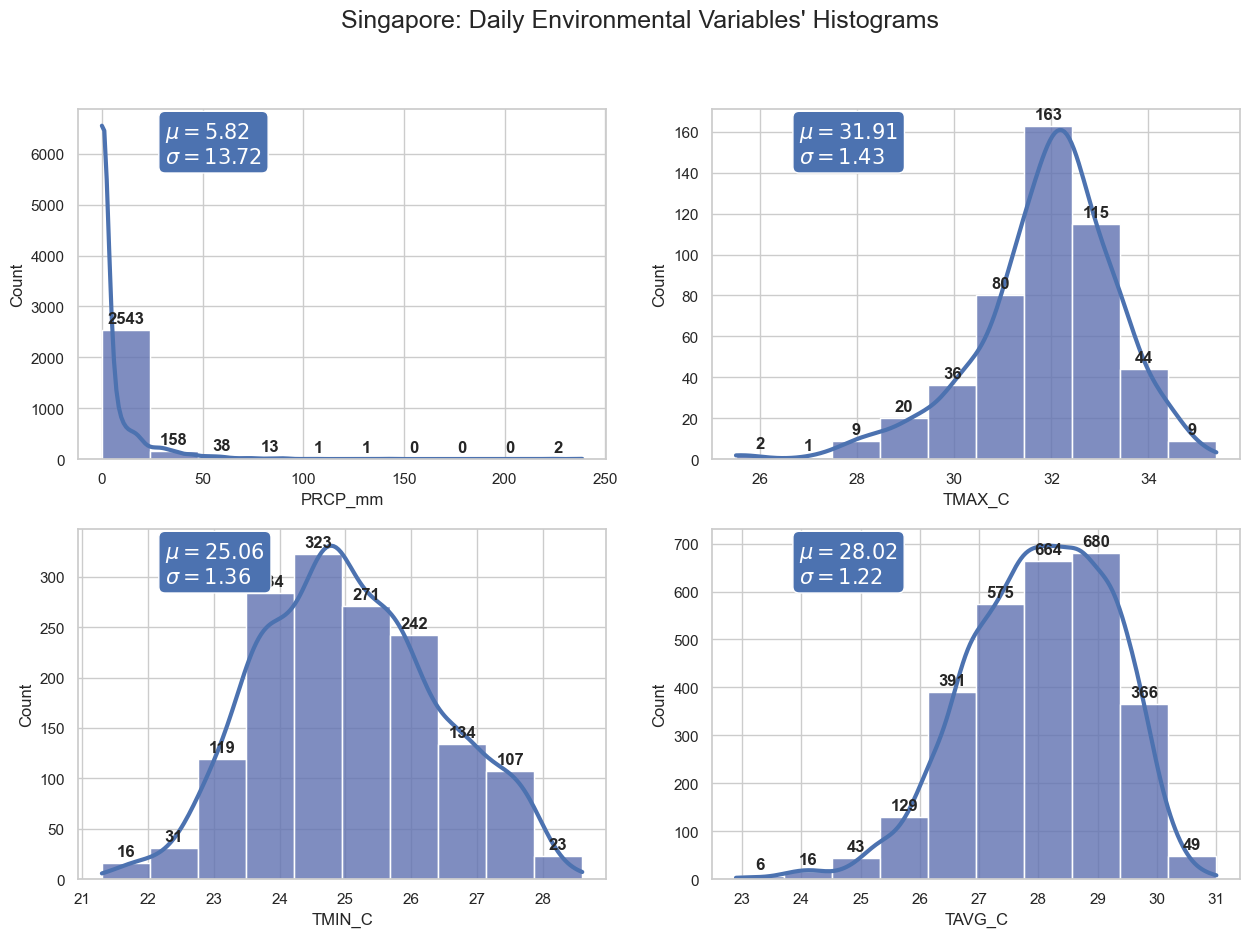

In [11]:
# Exploratory analysis of df_1 features
# Histogram
# Plot inspired by: https://www.kaggle.com/code/farzadnekouei/heart-disease-prediction/notebook

# Defining the environmental variables
environmental_variables = ["PRCP_mm", "TMAX_C", "TMIN_C", "TAVG_C"]

sns.set(style="whitegrid")
fig, axes = plt.subplots(2, math.ceil(len(environmental_variables) / 2), figsize=(15, 10))

for ax, feat in zip(axes.flatten(), environmental_variables):
    ax.set_ylabel('Count')
    # Plot histogram
    counts, bins, patches = ax.hist(df_1[feat].dropna(), color="m", alpha=0.6) 
    
    # Adding KDE and statistics
    sns.histplot(data=df_1, x=feat, bins=bins, kde=True, ax=ax, line_kws={'lw': 3})
    
    # Adding annotations for counts
    for count, patch in zip(counts, patches):
        ax.annotate(str(int(count)), xy=(patch.get_x() + patch.get_width() / 2, patch.get_height()),
                    xytext=(0, 5), textcoords='offset points',
                    ha='center', fontsize=12, fontweight='bold')
    
    # Adding mean and standard deviation text
    ax.text(0.165, 0.97, f'$\mu={df_1[feat].mean():.2f}$\n$\sigma={df_1[feat].std():.2f}$',
            transform=ax.transAxes, fontsize=15, verticalalignment='top', color='white',
            bbox=dict(boxstyle='round'))
    
plt.suptitle(f"{location}: Daily Environmental Variables' Histograms", fontsize=18)
plt.savefig(os.path.join(f"{location}_daily_environmental_variables_histograms.png"), dpi=200)
plt.show()

In [12]:
# Checking identified outliers of the precipitation variable
df_1.nlargest(4, 'PRCP_mm')

Date  Day  Month  Year  Latitude  Longitude  Elevation  \
1828 2021-01-02    2      1  2021      1.35    103.994        6.7   
2613 2023-03-01    1      3  2023      1.35    103.994        6.7   
1837 2021-01-11   11      1  2021      1.35    103.994        6.7   
1829 2021-01-03    3      1  2021      1.35    103.994        6.7   

                                    Name  PRCP_mm  TMAX_C  TMIN_C  TAVG_C  
1828  SINGAPORE CHANGI INTERNATIONAL, SN    238.5     NaN     NaN    23.1  
2613  SINGAPORE CHANGI INTERNATIONAL, SN    222.5     NaN    21.8    24.2  
1837  SINGAPORE CHANGI INTERNATIONAL, SN    141.5     NaN    23.3    25.8  
1829  SINGAPORE CHANGI INTERNATIONAL, SN    103.4     NaN    21.7    23.9

In [13]:
# Checking identified outliers of the maximum temperature variable
df_1.nsmallest(3, 'TMAX_C')

Date  Day  Month  Year  Latitude  Longitude  Elevation  \
2229 2022-02-10   10      2  2022      1.35    103.994        6.7   
2615 2023-03-03    3      3  2023      1.35    103.994        6.7   
335  2016-12-01    1     12  2016      1.35    103.994        6.7   

                                    Name  PRCP_mm  TMAX_C  TMIN_C  TAVG_C  
2229  SINGAPORE CHANGI INTERNATIONAL, SN     37.1    25.5     NaN    24.2  
2615  SINGAPORE CHANGI INTERNATIONAL, SN      0.0    25.7     NaN    24.7  
335   SINGAPORE CHANGI INTERNATIONAL, SN      2.0    27.2     NaN    25.4

#### Result

The histogram indicates outliers in the variable PRCP_mm, with two instances between 200 and 250 mm in January 2021 and March 2023. Considering the dynamic environmental nature and seasonal patterns, these two outliers can be identified as realistic. However, they can also represent errors in data collection.

The variable T_MAX reveals some considerable values at the lower quartile. These values are less extreme than those in the PRCP_mm variable. The two values were documented in February and March; therefore, they are determined as realistic concerning seasonality.

These variables and outlined outliers will be further investigated. Generally, it is a balance between capturing extreme values, not smoothing meaningful results, and reducing noise. Aspects from the literature review, so-called flushing events, show an influence on dengue transmission; therefore, they definitely need to be considered. 

#### Exploration of the temperature variables

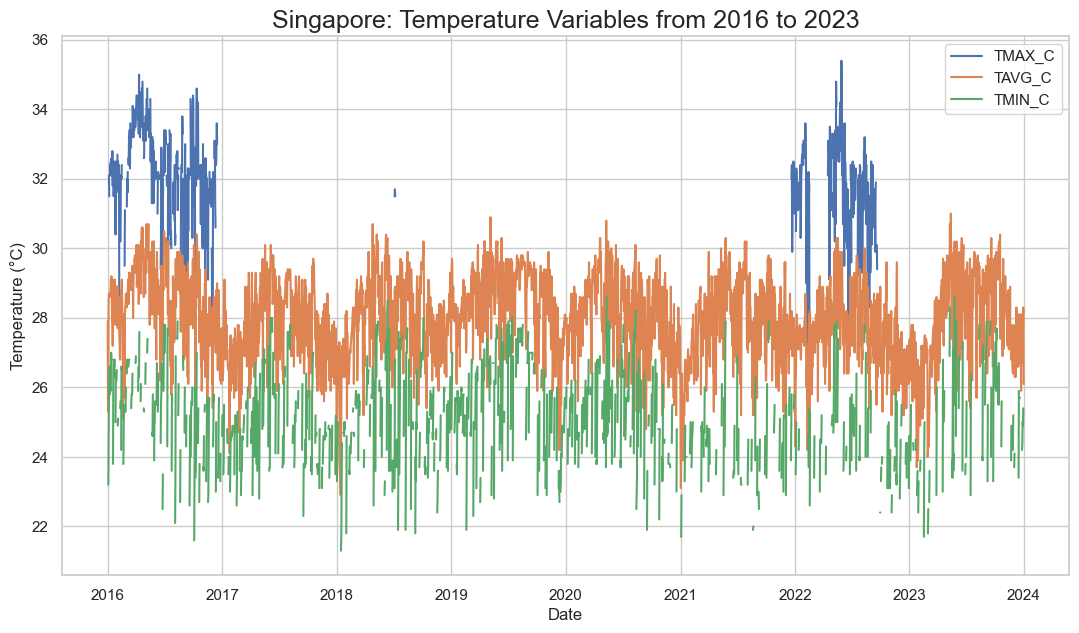

In [14]:
# Daily average, minimum, and maximum temperature in a plot, proving stationarity, showing distribution, missing values, and outliers

sns.set(style="whitegrid")
plt.figure(figsize=(13, 7))

for column in ['TMAX_C', 'TAVG_C', 'TMIN_C']:
    plt.plot(df_1['Date'], df_1[column], label=column)

plt.title(f"{location}: Temperature Variables from 2016 to 2023", fontsize=18)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.savefig(os.path.join(f"{location}_temperature_variables.png"), dpi=200)
plt.show()

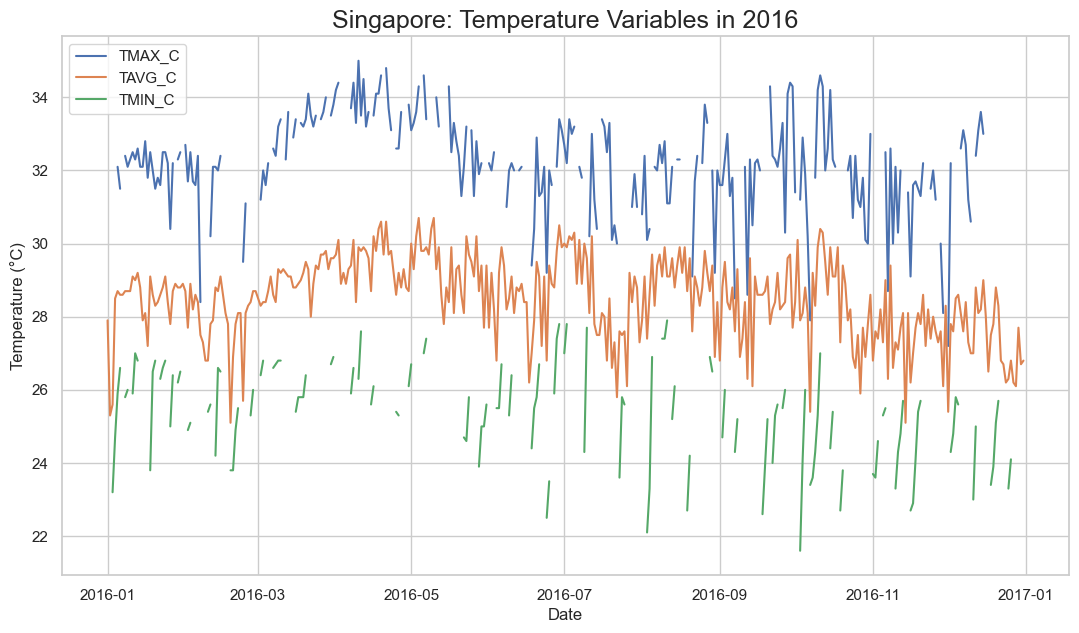

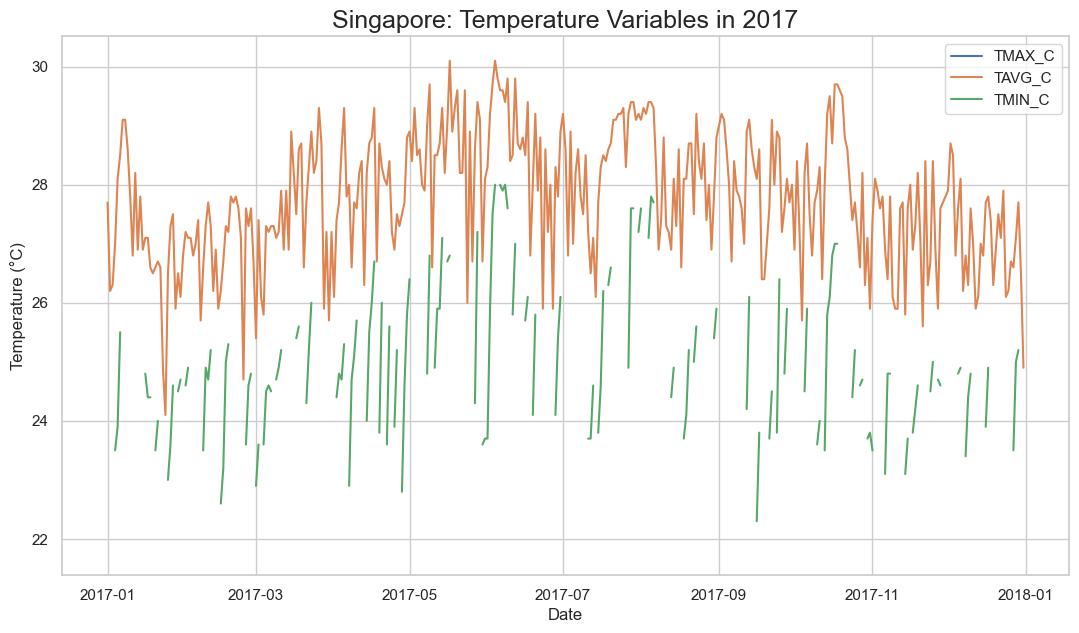

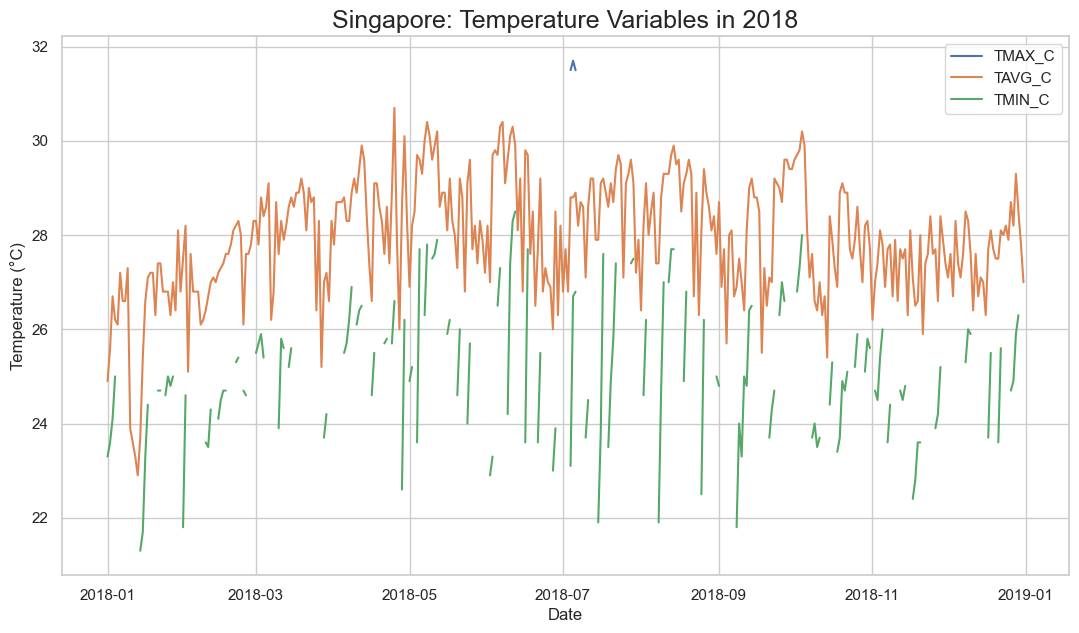

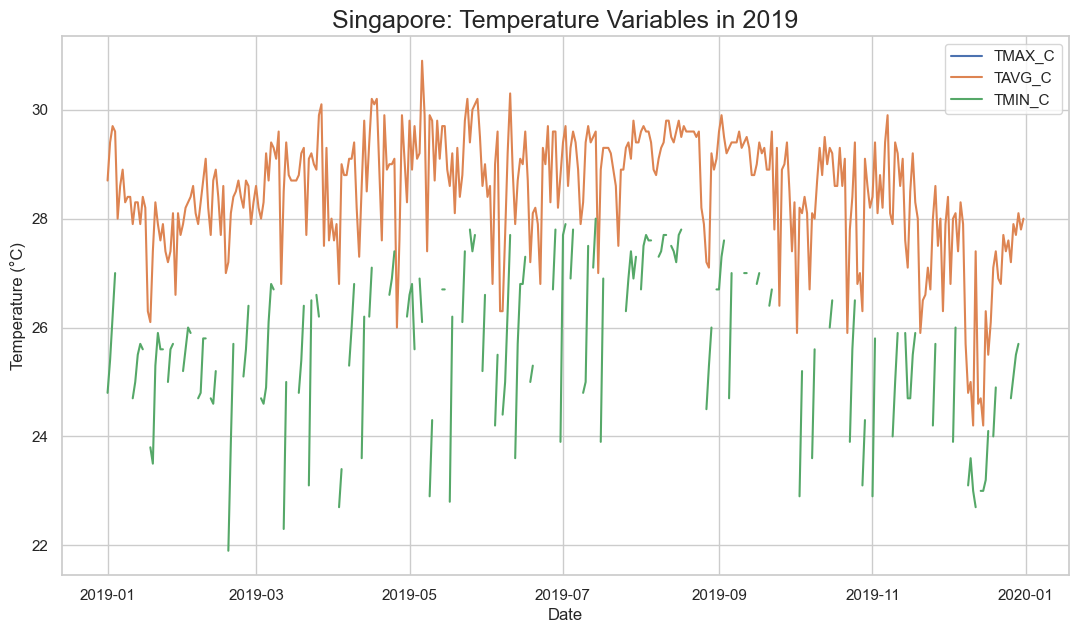

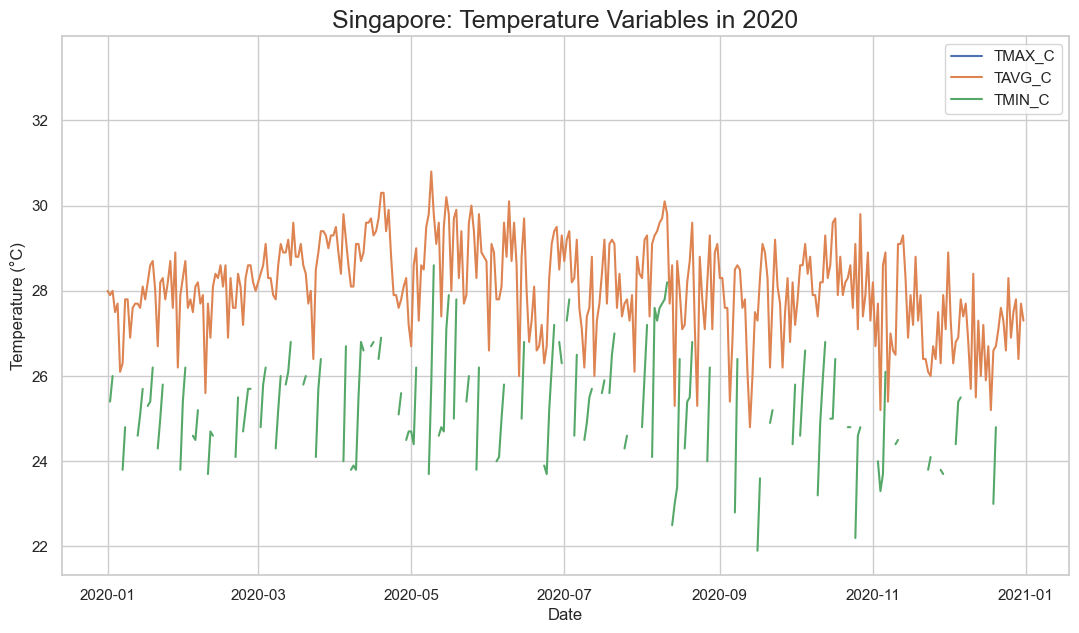

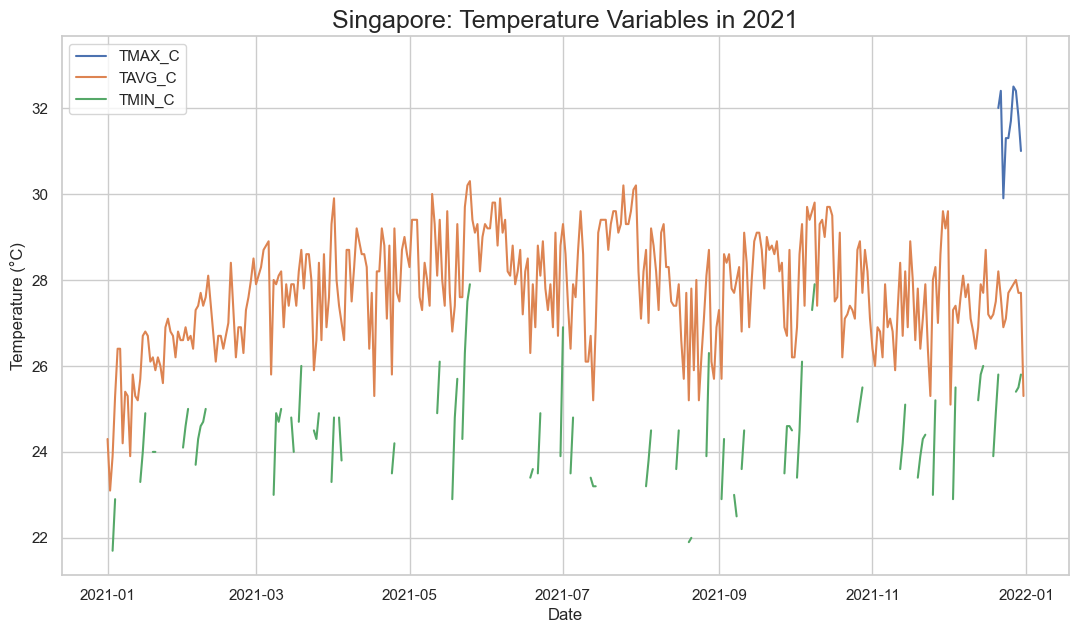

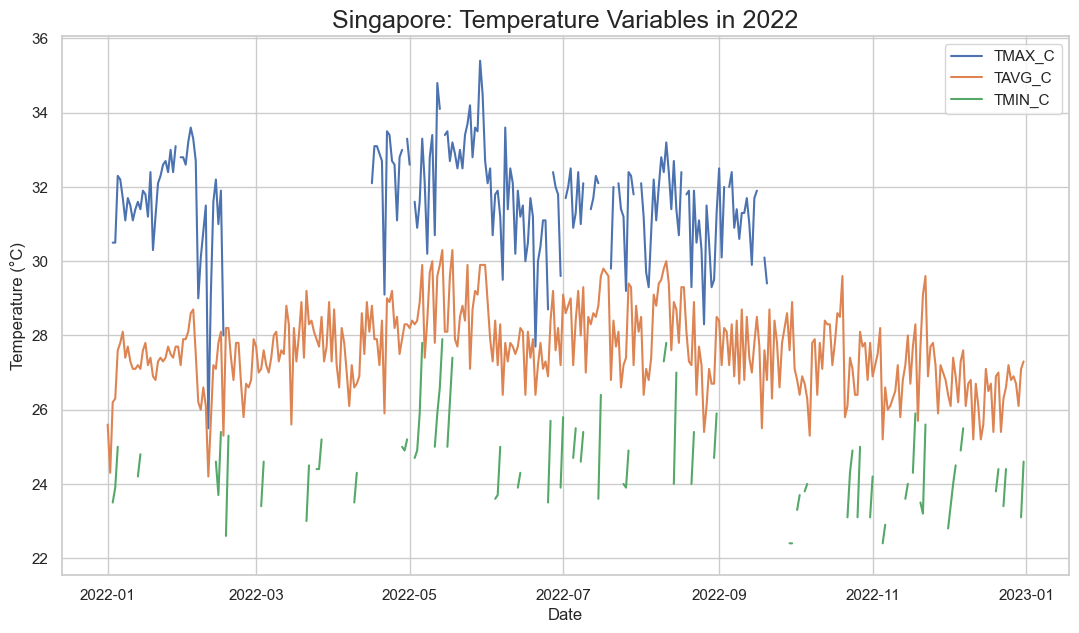

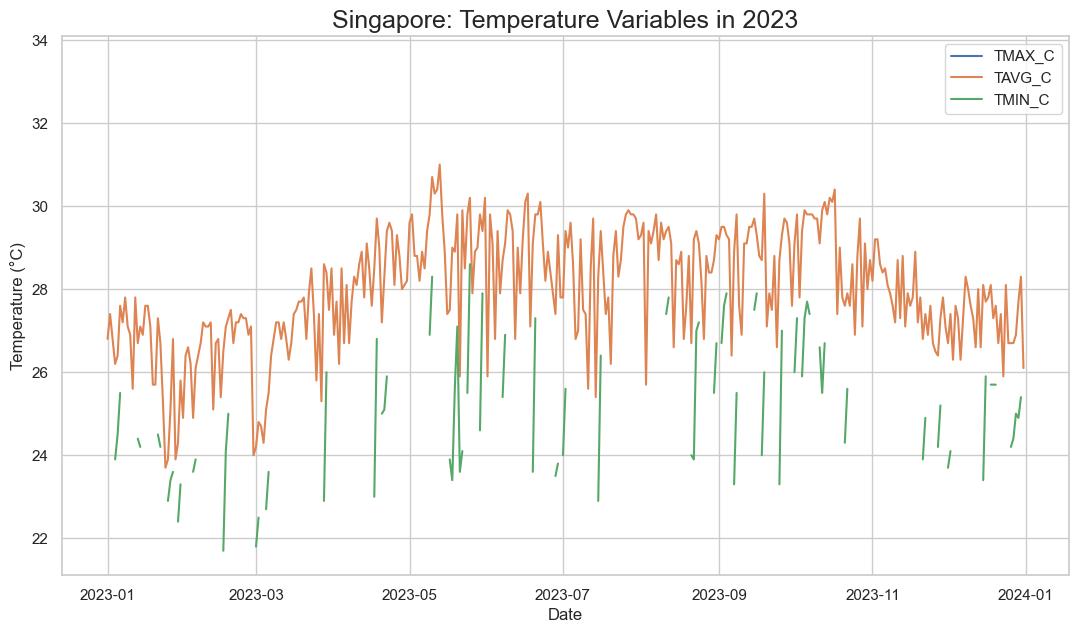

In [15]:
# Iterate through each year and create individual plots to detect the seasonality and occurring trends better.
# The main goal here is not the univariate analysis of individual features but the analysis of yearly variations.

years = df_1['Year'].unique()

for year in years:
    year_data = df_1[df_1['Year'] == year]
    
    plt.figure(figsize=(13, 7))
    
    for column in ['TMAX_C', 'TAVG_C', 'TMIN_C']:
        plt.plot(year_data['Date'], year_data[column], label=column)
    
    plt.title(f'{location}: Temperature Variables in {year}', fontsize=18)
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.legend()
    plt.savefig(os.path.join(f"{location}_temperature_variables_in_{year}.png"), dpi=200)
    plt.show()

#### Exploration of the precipitation variable

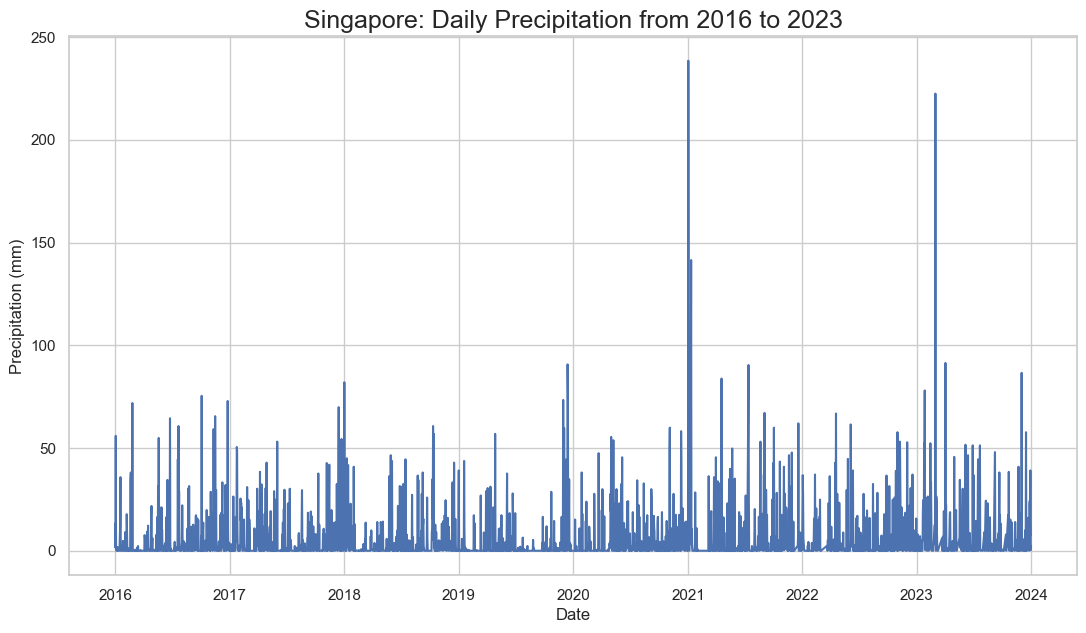

In [16]:
# Daily precipitation visualized in a plot

plt.figure(figsize=(13, 7))
sns.lineplot(data=df_1, x='Date', y='PRCP_mm')
plt.title(f"{location}: Daily Precipitation from 2016 to 2023", fontsize=18)
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.savefig(os.path.join(f"{location}_daily_precipitation.png"), dpi=200)
plt.show()

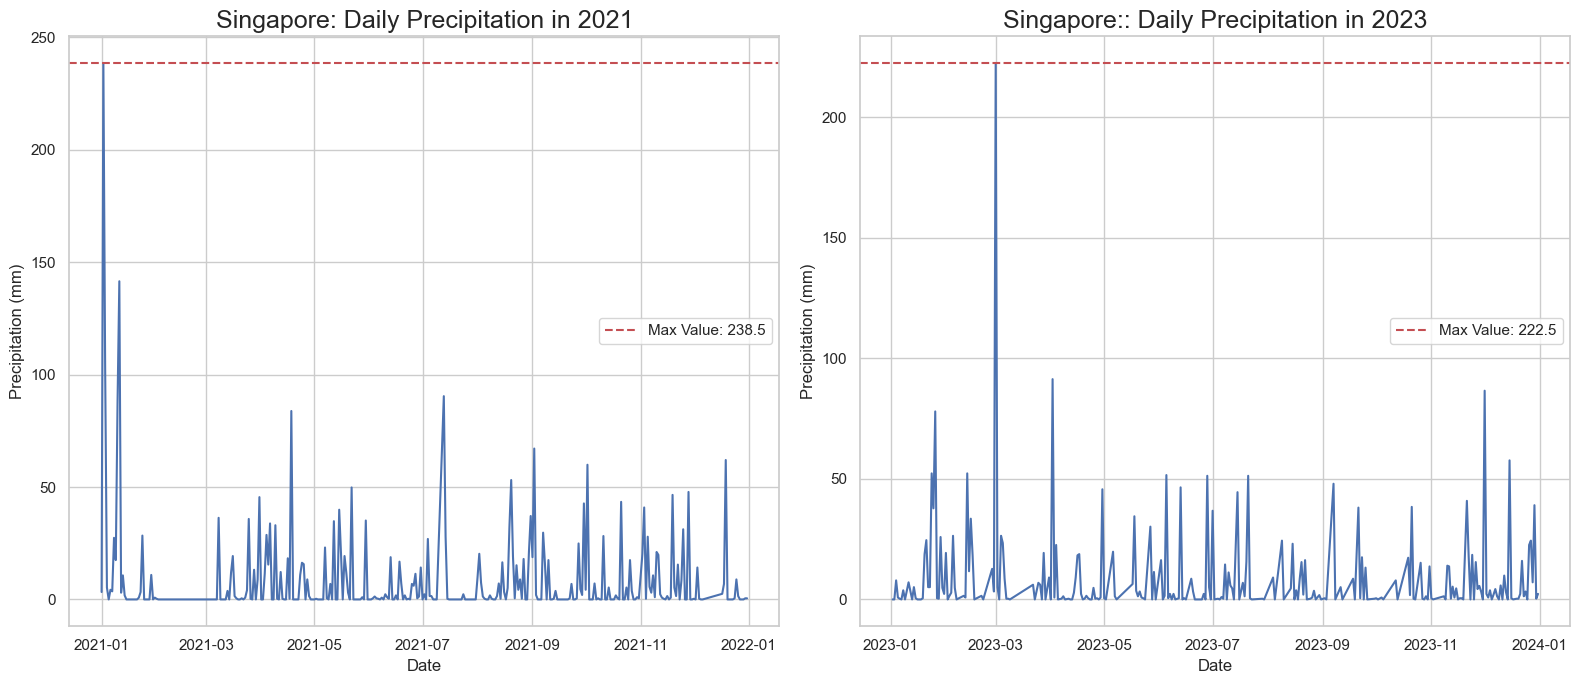

In [17]:
# The two detected outlier values in 2021 and 2023 are displayed in two subplots for further examination.

plt.figure(figsize=(16, 7))

# Subplot for 2021
plt.subplot(1, 2, 1)
sns.lineplot(data=df_1[(df_1['Year'] == 2021)], 
             x='Date', y='PRCP_mm')
max_value_2021 = df_1[df_1['Year'] == 2021]['PRCP_mm'].max()
plt.axhline(y=max_value_2021, color='r', linestyle='--', label=f'Max Value: {max_value_2021}')
plt.title(f"{location}: Daily Precipitation in 2021", fontsize=18)
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()

# Subplot for 2023
plt.subplot(1, 2, 2)
sns.lineplot(data=df_1[(df_1['Year'] == 2023)], 
             x='Date', y='PRCP_mm')
max_value_2023 = df_1[df_1['Year'] == 2023]['PRCP_mm'].max()
plt.axhline(y=max_value_2023, color='r', linestyle='--', label=f'Max Value: {max_value_2023}')
plt.title(f"{location}:: Daily Precipitation in 2023", fontsize=18)
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(f"{location}_outlier_precipitation.png"), dpi=200)
plt.show()

#### Result
The TMAX_C variable shows many missing values, with exceptions in 2016 and 2021. This is an important finding regarding the upcoming missing value imputation. Using time series data, this process needs careful exploration and implementation. An advantage is the relationship observed between the temperature variables, which qualifies for advanced imputation techniques. 

The variable PRCP_mm does not reveal a clear pattern or long-term trend. The two outliers detected in January 2021 and March 2023 support a trend but do not confirm a strong association with seasonality.

### b. df_2

#### Exploratory functions

In [18]:
# Exploring the data types and structure using exploratory functions
# Singapore represents the incidence of Singapore.
df_2.head()

Year  Week  Month       Date  Incidence
0  2016     1      1 2016-01-01        547
1  2016     2      1 2016-01-08        620
2  2016     3      1 2016-01-15        637
3  2016     4      1 2016-01-22        624
4  2016     5      1 2016-01-29        525

In [19]:
# Exploring the data types and structure using exploratory functions
# ['Date'] is shown in the format year, week, month, and date (yyyy-mm-dd)
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Year       417 non-null    int64         
 1   Week       417 non-null    int64         
 2   Month      417 non-null    int64         
 3   Date       417 non-null    datetime64[ns]
 4   Incidence  417 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.4 KB


In [20]:
# Exploring the data types and structure using exploratory functions
df_2.describe().T

count                           mean                  min  \
Year       417.0                    2019.501199               2016.0   
Week       417.0                      26.563549                  1.0   
Month      417.0                       6.431655                  1.0   
Date         417  2019-12-29 03:09:55.683453184  2016-01-01 00:00:00   
Incidence  417.0                     282.721823                 24.0   

                           25%                  50%                  75%  \
Year                    2018.0               2020.0               2021.0   
Week                      14.0                 27.0                 40.0   
Month                      4.0                  7.0                  9.0   
Date       2018-01-01 00:00:00  2020-01-01 00:00:00  2021-12-24 00:00:00   
Incidence                 75.0                174.0                342.0   

                           max         std  
Year                    2023.0    2.291419  
Week                      53.0    15.06433  
Month                     12.0     3.46143  
Date       2023-12-24 00:00:00         NaN  
Incidence               1792.0  325.347151

In [21]:
# Exploration of missing values
df_2.isnull().sum()

Year         0
Week         0
Month        0
Date         0
Incidence    0
dtype: int64

#### Result
The data frame df_2 holds incidence data of Singapore City not containing any missing values. A high spread of the incidence data identifies with weekly values between 24 and 1792 instances.

#### Exploratory visualizations

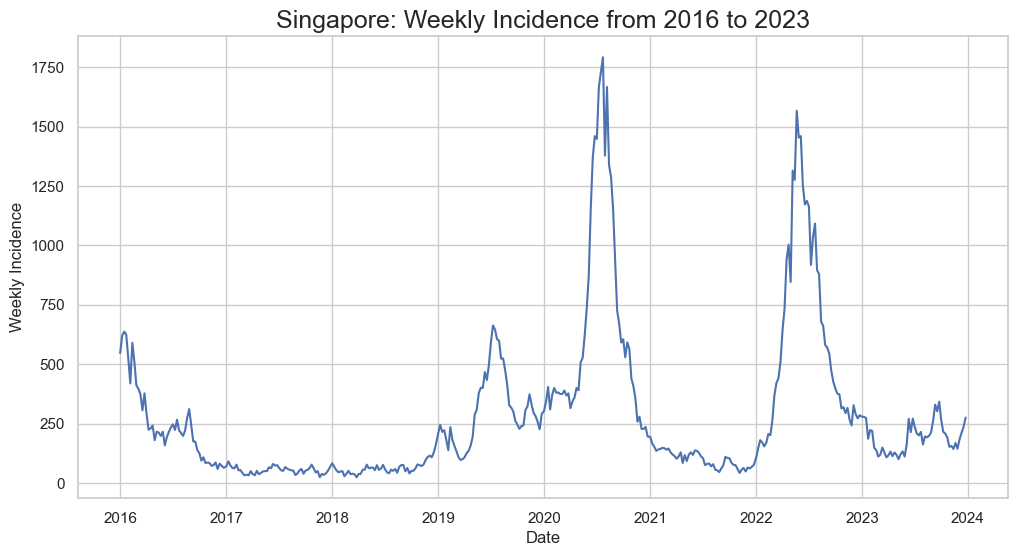

In [22]:
# Plot of the monthly incidence in Singapore from 2016 to 2023

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_2, x='Date', y='Incidence')
plt.title(f"{location}: Weekly Incidence from 2016 to 2023", fontsize=18)
plt.xlabel('Date')
plt.ylabel('Weekly Incidence')
plt.savefig(os.path.join(f"{location}_weekly_incidence.png"), dpi=200)
plt.show()

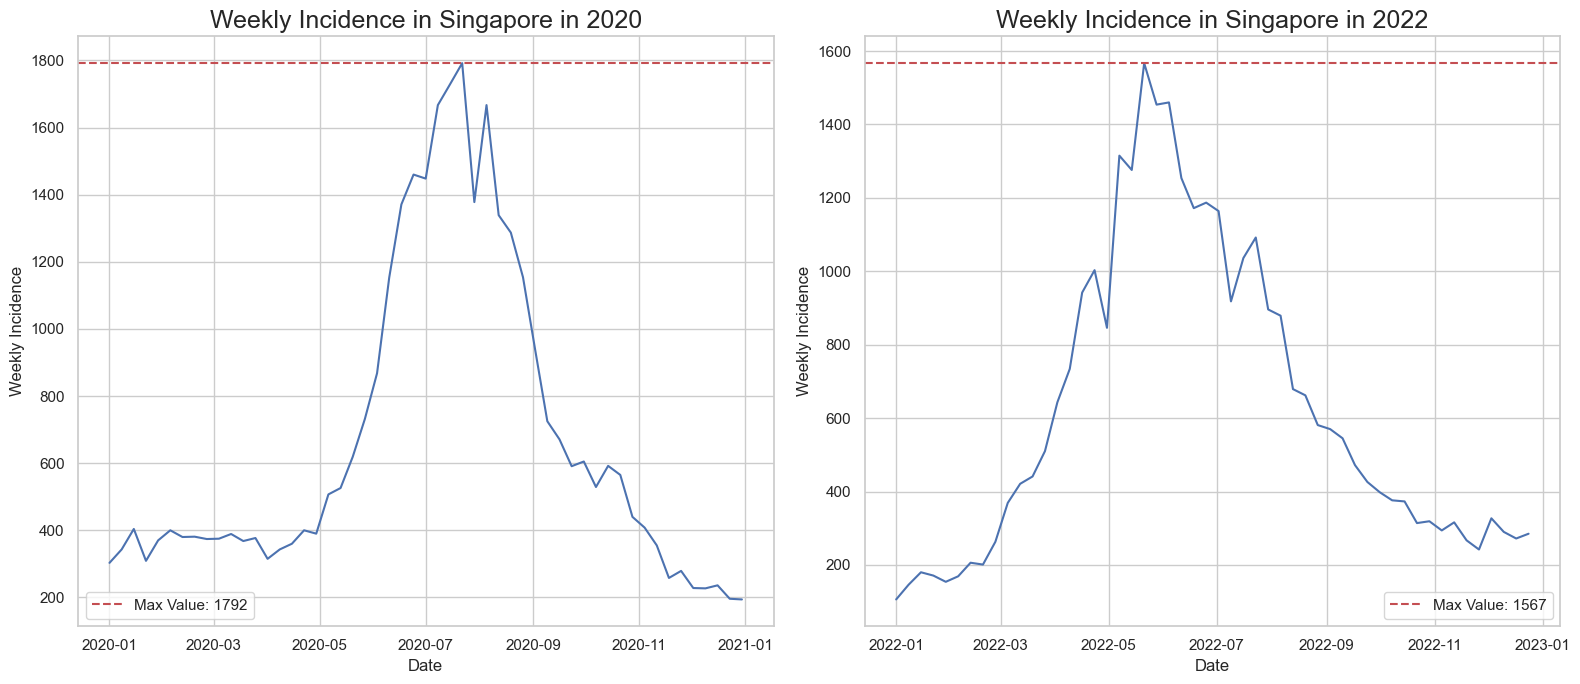

In [23]:
# Plot displaying the strongest incidence in 2020 and 2022 for further analysis, showing one yearly peak.

sns.set(style="whitegrid")
plt.figure(figsize=(16, 7))

# Subplot for 2020
plt.subplot(1, 2, 1)
sns.lineplot(data=df_2[(df_2['Year'] == 2020)], 
             x='Date', y='Incidence')
max_value_2020 = df_2[df_2['Year'] == 2020]['Incidence'].max()
plt.axhline(y=max_value_2020, color='r', linestyle='--', label=f'Max Value: {max_value_2020}')
plt.title(f"Weekly Incidence in {location} in 2020", fontsize=18)
plt.xlabel('Date')
plt.ylabel('Weekly Incidence')
plt.legend()

# Subplot for 2022
plt.subplot(1, 2, 2)
sns.lineplot(data=df_2[(df_2['Year'] == 2022)], 
             x='Date', y='Incidence')
max_value_2022 = df_2[df_2['Year'] == 2022]['Incidence'].max()
plt.axhline(y=max_value_2022, color='r', linestyle='--', label=f'Max Value: {max_value_2022}')
plt.title(f"Weekly Incidence in {location} in 2022", fontsize=18)
plt.xlabel('Date')
plt.ylabel('Weekly Incidence')
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(f"{location}_incidence_outliers.png"), dpi=200)
plt.show()

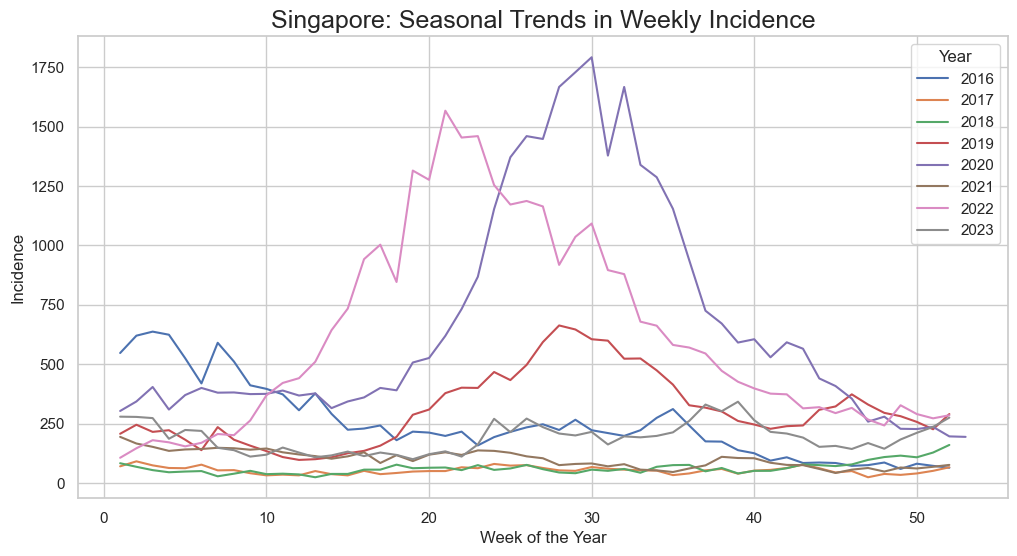

In [24]:
# Check for seasonal dependencies using a visualization technique that displies the incidence of each year.

# Grouping the data by year for extraction
grouped_data = df_2.groupby('Year')['Incidence'].apply(list)

plt.figure(figsize=(12, 6))

for year, values in grouped_data.items():
    weeks = df_2[df_2['Year'] == year]['Week']
    plt.plot(weeks, values, label=str(year))

plt.title(f"{location}: Seasonal Trends in Weekly Incidence", fontsize=18)
plt.xlabel('Week of the Year')
plt.ylabel('Incidence')
plt.legend(title='Year')
plt.grid(True)
plt.savefig(os.path.join(f"{location}_seasonal_trends_weekly_incidence.png"), dpi=200, bbox_inches='tight')
plt.show()

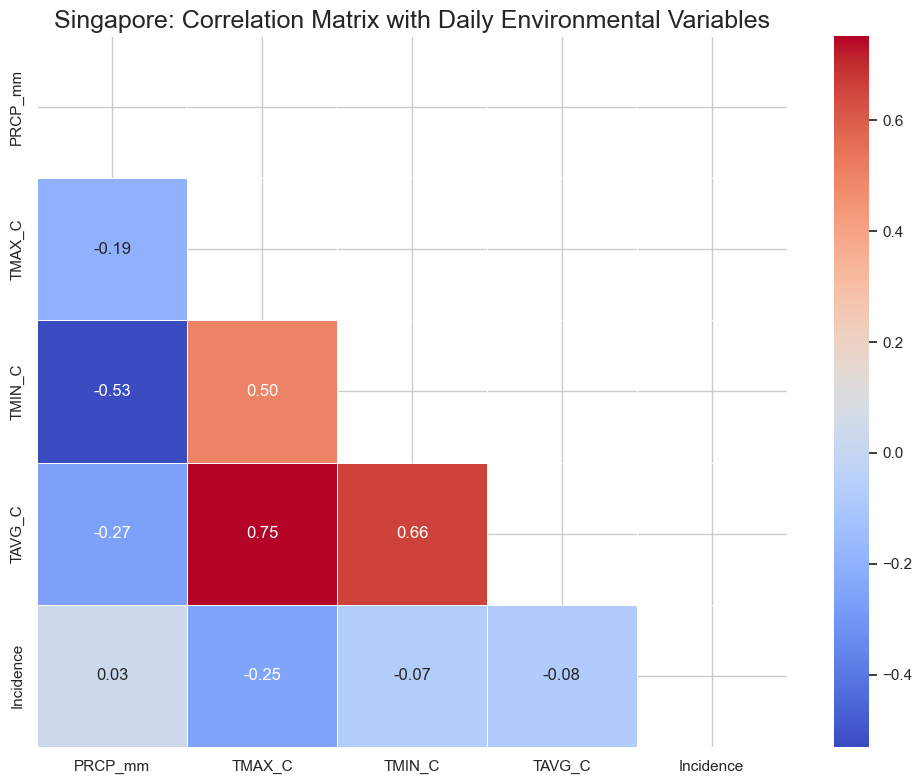

In [25]:
# Correlation matrix with the target variable

# Combine selected variables from df_1 and df_2
combined_df = pd.concat([df_1[["PRCP_mm", "TMAX_C", "TMIN_C", "TAVG_C"]], df_2["Incidence"]], axis=1)

# Create a correlation matrix for combined_df
correlation_matrix = combined_df.corr()

# Generate a mask for the upper triangle for combined_df
mask_combined = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure for combined_df
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio for combined_df
sns.heatmap(correlation_matrix, mask=mask_combined, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title(f"{location}: Correlation Matrix with Daily Environmental Variables", fontsize=18)
plt.tight_layout()
plt.savefig(os.path.join(f"{location}_correlation_matrix_daily.png"), dpi=200)
plt.show()

#### Result

The strongest incidence was detected in 2020 and 2022, with one strong yearly peak. A slight shift in the trend was detectable in 2020 from July to September and 2022 from May to July. Checking the weekly incidence for seasonal dependencies did not reveal a clear seasonality, with 2017 and 2018 not revealing any trend and 2016 showing unexpectedly high incidence at the beginning of the year.

In that context, the correlation of the target variable was analyzed, showing moderate results, with maximum temperature showing the highest negative correlation of -0.25. At this point, the different scales of daily and weekly data need to be carefully considered.

## 3. Data Preprocessing
In this project, the main objective of data preprocessing is to address inconsistencies observed during the exploratory analysis and perform data cleaning to ensure data consistency by imputing missing values, treating outliers, and handling time series characteristics. 

Subsequently, further data engineering steps, including feature scaling, will be performed to increase interpretability. All datasets contain numerical data, with df_1 containing one categorical variable, Raining_Day, which is not integrated yet; therefore, encoding is unneeded.


### a. Data Imputation

The type of missing values is classified as Missing Completely at Random (MCAR). Missing values require a careful imputation to capture the temporal order of observations. The patterns of missing values differ for each variable; therefore, multiple methods were explored for all variables individually. Approaches like deletion and mean/median/mode imputation were not considered. The objective was to maintain a cohesive time series data structure for the analysis.

The following imputation methods were tested and considered: 

| Approach                           | Description                                                                                             | Comment                                                                                                             |
|------------------------------------|---------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------|
| *Last Observation Carried Forward (LOCF)* | Replaces missing values with the immediately preceding non-missing value. | Not effective for continuous gaps and may not capture underlying trends or seasonality. However, it is useful for short-term periods. |
| *Next Observation Carried Backward  (NOCB)* | Replaces missing values with the immediately following non-missing value. | Similar limitations as LOCF; not effective for continuous gaps and may not capture underlying trends or seasonality. However, it is useful for short-term periods. |
| *Rolling Mean Statistics* | Replaces missing values with a rolling mean statistic over a specific period, namely, window. | Not suitable for continuous gaps; preserves trends and seasonality but may introduce biases and underestimate variability. |
| *Simple Moving Average (SMA)* | Replaces missing values with the average of a fixed number of the most recent observations. | Might not be suitable for continuous gaps. However, notice can be reduced for short-term window periods. |
| *Exponential Moving Average (EMA)* | Replaces missing values with a weighted average where more recent observations have a higher weight. | Might not be suitable for continuous gaps; however, it is more responsive to trends than SMA. |
| *Multiple Imputation (MICE)* | Estimates missing values by creating projections based on chained equations, iteratively imputing each value based on other selected variables. Combining multiple estimates for each missing value provides a robust result. | Suitable for handling missing data patterns but may be computationally intensive and require careful model selection. |
| *STL Decomposition* | Breaks down the time series into trend, seasonality, and residuals, then imputes missing values before reassembling the components. | Not recommended for MCAR situations as it does not handle missing data patterns effectively. |


Inspiration: https://medium.com/@aaabulkhair/data-imputation-demystified-time-series-data-69bc9c798cb7#:~:text=Rolling%20Statistics%20Imputation%20is%20a,over%20a%20defined%20window%20period

In [26]:
# Repeated exploration of the number of missing values
df_1.isnull().sum()

Date            0
Day             0
Month           0
Year            0
Latitude        0
Longitude       0
Elevation       0
Name            0
PRCP_mm       163
TMAX_C       2440
TMIN_C       1369
TAVG_C          0
dtype: int64

In [27]:
# Second exploration of the mean and std dev for data structure maintenance when filling in missing values.
df_1.describe()

Date          Day        Month         Year  \
count                           2919  2919.000000  2919.000000  2919.000000   
mean   2019-12-31 01:51:59.013360640    15.731072     6.527578  2019.497431   
min              2016-01-01 00:00:00     1.000000     1.000000  2016.000000   
25%              2017-12-30 12:00:00     8.000000     4.000000  2017.000000   
50%              2019-12-30 00:00:00    16.000000     7.000000  2019.000000   
75%              2021-12-31 12:00:00    23.000000    10.000000  2021.500000   
max              2023-12-31 00:00:00    31.000000    12.000000  2023.000000   
std                              NaN     8.805061     3.448014     2.292501   

           Latitude     Longitude     Elevation      PRCP_mm      TMAX_C  \
count  2.919000e+03  2.919000e+03  2.919000e+03  2756.000000  479.000000   
mean   1.350000e+00  1.039940e+02  6.700000e+00     5.823875   31.914196   
min    1.350000e+00  1.039940e+02  6.700000e+00     0.000000   25.500000   
25%    1.350000e+00  1.039940e+02  6.700000e+00     0.000000   31.200000   
50%    1.350000e+00  1.039940e+02  6.700000e+00     0.300000   32.100000   
75%    1.350000e+00  1.039940e+02  6.700000e+00     5.100000   32.800000   
max    1.350000e+00  1.039940e+02  6.700000e+00   238.500000   35.400000   
std    2.220826e-16  1.421329e-14  8.883306e-16    13.721103    1.432719   

            TMIN_C       TAVG_C  
count  1550.000000  2919.000000  
mean     25.061806    28.020692  
min      21.300000    22.900000  
25%      24.000000    27.200000  
50%      25.000000    28.100000  
75%      26.000000    28.900000  
max      28.600000    31.000000  
std       1.358805     1.216619

#### Each method for all variables

In the following, each imputation method is tested for all temperature variables. The supporting visual component will imply how successfully missing values are imputed and display anomalies. 

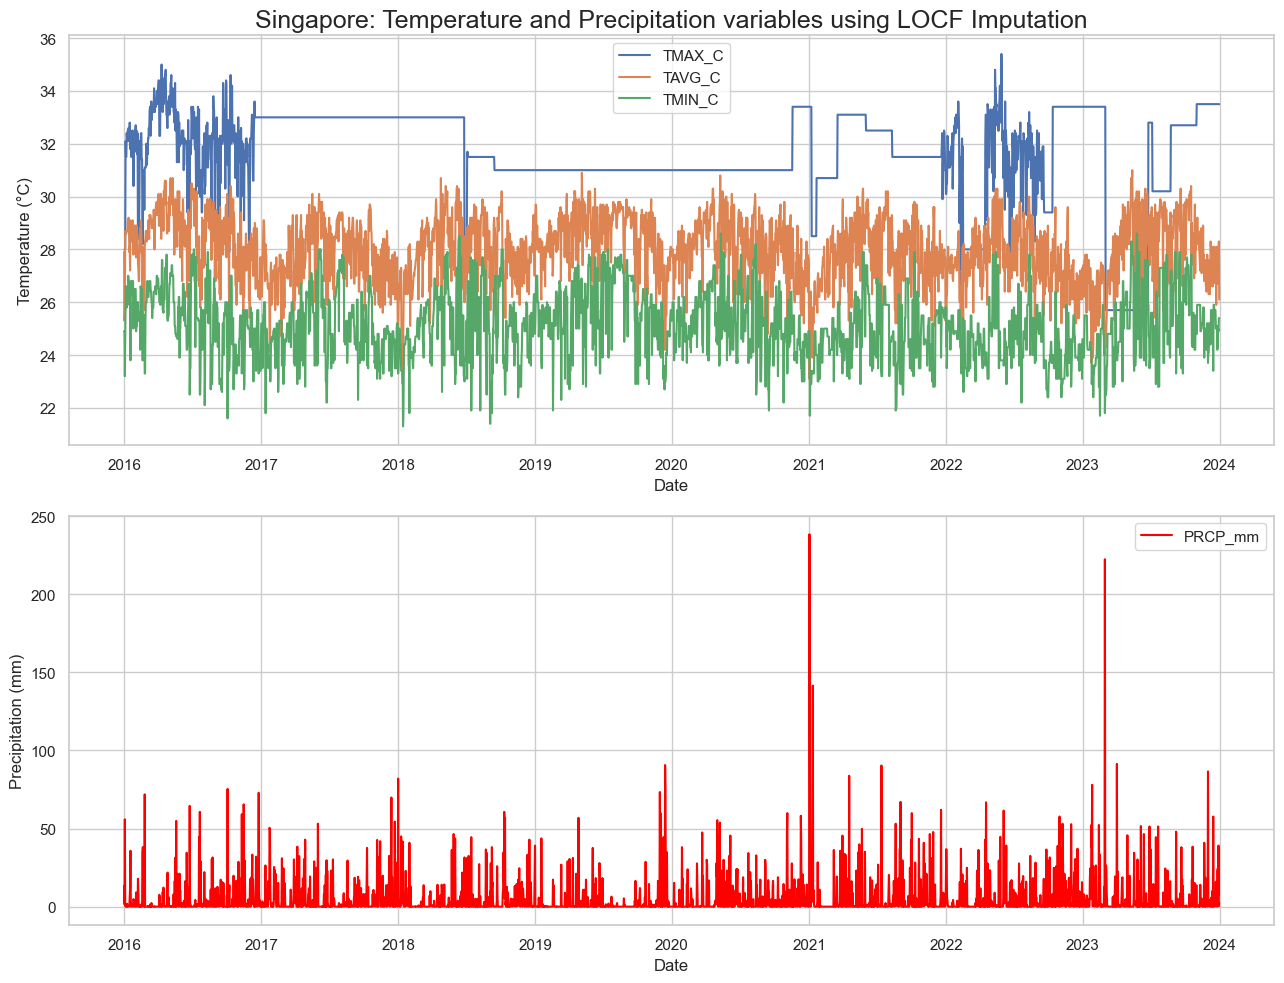

In [28]:
# Testing the LOCF method for all variables 

# Create a copy of the original DataFrame
df_1_locf = df_1.copy()

# Select the variables to include in the LOCF imputation process
selected_variables = ['TAVG_C', 'TMIN_C', 'TMAX_C', 'PRCP_mm']

# Apply the forward fill method to impute missing values for the selected variables
df_1_locf[selected_variables] = df_1_locf[selected_variables].ffill()

# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

# Visualize imputed daily average, minimum, and maximum temperature variables
for column in ['TMAX_C', 'TAVG_C', 'TMIN_C']:
    axes[0].plot(df_1_locf['Date'], df_1_locf[column], label=column)

axes[0].set_title(f"{location}: Temperature and Precipitation variables using LOCF Imputation", fontsize=18)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Temperature (°C)')
axes[0].legend()

# Precipitation variable in a second subplot for appropriate scaling
axes[1].plot(df_1_locf['Date'], df_1_locf['PRCP_mm'], label='PRCP_mm', color='red')

axes[1].set_xlabel('Date')
axes[1].set_ylabel('Precipitation (mm)')
axes[1].legend()

plt.tight_layout()
plt.savefig(os.path.join(f"{location}_locf_imputation.png"), dpi=200)
plt.show()

In [29]:
df_1_locf.describe()

Date          Day        Month         Year  \
count                           2919  2919.000000  2919.000000  2919.000000   
mean   2019-12-31 01:51:59.013360640    15.731072     6.527578  2019.497431   
min              2016-01-01 00:00:00     1.000000     1.000000  2016.000000   
25%              2017-12-30 12:00:00     8.000000     4.000000  2017.000000   
50%              2019-12-30 00:00:00    16.000000     7.000000  2019.000000   
75%              2021-12-31 12:00:00    23.000000    10.000000  2021.500000   
max              2023-12-31 00:00:00    31.000000    12.000000  2023.000000   
std                              NaN     8.805061     3.448014     2.292501   

           Latitude     Longitude     Elevation      PRCP_mm       TMAX_C  \
count  2.919000e+03  2.919000e+03  2.919000e+03  2919.000000  2918.000000   
mean   1.350000e+00  1.039940e+02  6.700000e+00     5.501096    31.627073   
min    1.350000e+00  1.039940e+02  6.700000e+00     0.000000    25.500000   
25%    1.350000e+00  1.039940e+02  6.700000e+00     0.000000    31.000000   
50%    1.350000e+00  1.039940e+02  6.700000e+00     0.000000    31.500000   
75%    1.350000e+00  1.039940e+02  6.700000e+00     4.300000    33.000000   
max    1.350000e+00  1.039940e+02  6.700000e+00   238.500000    35.400000   
std    2.220826e-16  1.421329e-14  8.883306e-16    13.398929     1.749427   

            TMIN_C       TAVG_C  
count  2919.000000  2919.000000  
mean     25.184173    28.020692  
min      21.300000    22.900000  
25%      24.200000    27.200000  
50%      25.100000    28.100000  
75%      26.000000    28.900000  
max      28.600000    31.000000  
std       1.326116     1.216619

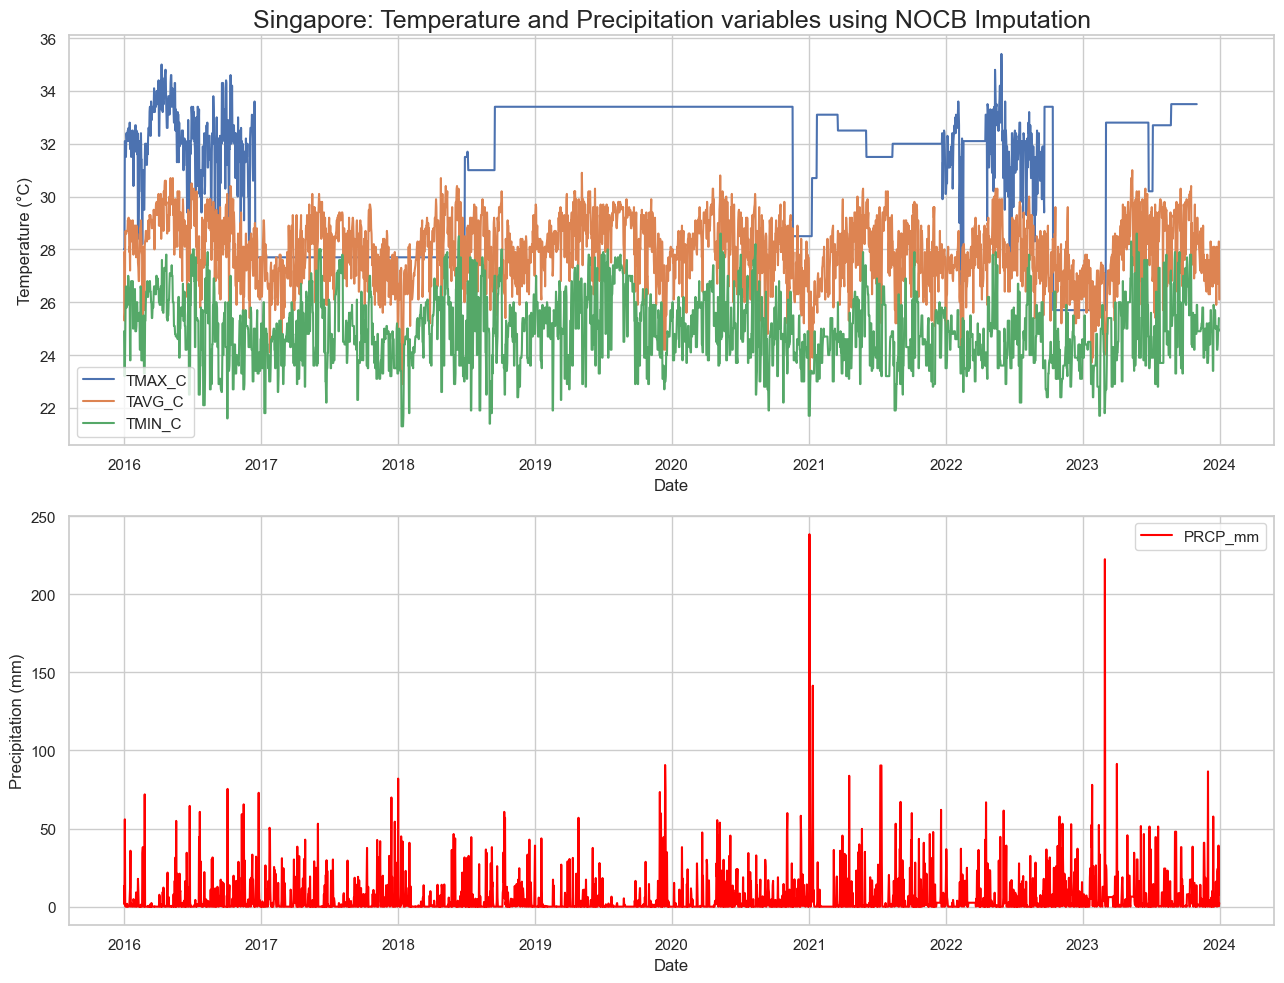

In [30]:
# Testing the NOCB method for all variables 

# Create a copy of the original DataFrame
df_1_nocb = df_1.copy()

# Select the variables to include in the LOCF imputation process
# selected_variables = ['TAVG_C', 'TMIN_C', 'TMAX_C', 'PRCP_mm']

# Apply the forward fill method to impute missing values for the selected variables
df_1_nocb[selected_variables] = df_1_nocb[selected_variables].bfill()

# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

# Visualize imputed daily average, minimum, and maximum temperature variables
for column in ['TMAX_C', 'TAVG_C', 'TMIN_C']:
    axes[0].plot(df_1_nocb['Date'], df_1_nocb[column], label=column)

axes[0].set_title(f"{location}: Temperature and Precipitation variables using NOCB Imputation", fontsize=18)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Temperature (°C)')
axes[0].legend()

# Precipitation variable in a second subplot for appropriate scaling
axes[1].plot(df_1_nocb['Date'], df_1_nocb['PRCP_mm'], label='PRCP_mm', color='red')

axes[1].set_xlabel('Date')
axes[1].set_ylabel('Precipitation (mm)')
axes[1].legend()

plt.tight_layout()
plt.savefig(os.path.join(f"{location}_nocb_imputation.png"), dpi=200)
plt.show()

In [31]:
df_1_nocb.describe()

Date          Day        Month         Year  \
count                           2919  2919.000000  2919.000000  2919.000000   
mean   2019-12-31 01:51:59.013360640    15.731072     6.527578  2019.497431   
min              2016-01-01 00:00:00     1.000000     1.000000  2016.000000   
25%              2017-12-30 12:00:00     8.000000     4.000000  2017.000000   
50%              2019-12-30 00:00:00    16.000000     7.000000  2019.000000   
75%              2021-12-31 12:00:00    23.000000    10.000000  2021.500000   
max              2023-12-31 00:00:00    31.000000    12.000000  2023.000000   
std                              NaN     8.805061     3.448014     2.292501   

           Latitude     Longitude     Elevation      PRCP_mm       TMAX_C  \
count  2.919000e+03  2.919000e+03  2.919000e+03  2919.000000  2859.000000   
mean   1.350000e+00  1.039940e+02  6.700000e+00     6.008804    31.237810   
min    1.350000e+00  1.039940e+02  6.700000e+00     0.000000    25.500000   
25%    1.350000e+00  1.039940e+02  6.700000e+00     0.000000    28.500000   
50%    1.350000e+00  1.039940e+02  6.700000e+00     0.300000    32.200000   
75%    1.350000e+00  1.039940e+02  6.700000e+00     5.600000    33.400000   
max    1.350000e+00  1.039940e+02  6.700000e+00   238.500000    35.400000   
std    2.220826e-16  1.421329e-14  8.883306e-16    13.807498     2.516878   

            TMIN_C       TAVG_C  
count  2918.000000  2919.000000  
mean     24.822721    28.020692  
min      21.300000    22.900000  
25%      23.800000    27.200000  
50%      24.700000    28.100000  
75%      25.700000    28.900000  
max      28.600000    31.000000  
std       1.345764     1.216619

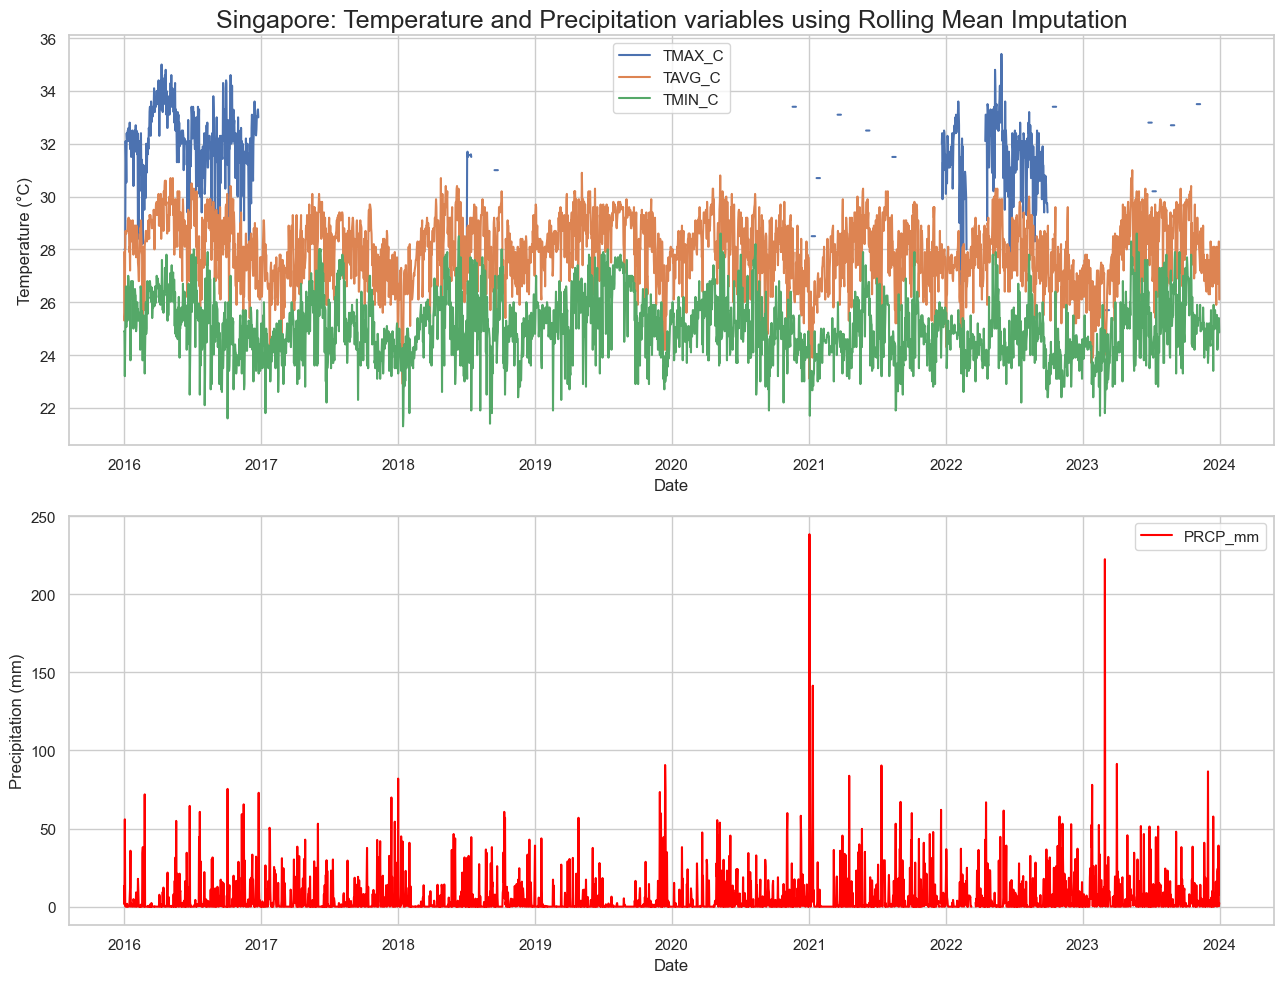

In [32]:
# Testing Rolling Mean Statistics for all variables

# Make a copy of the original DataFrame
df_1_rolling = df_1.copy()

# Select the variables to include in the LOCF imputation process
# selected_variables = ['TAVG_C', 'TMIN_C', 'TMAX_C', 'PRCP_mm']

# Mark the missing values before imputation
imputed_indices = df_1_rolling[df_1_rolling[selected_variables].isnull()].index

# Apply the rolling mean imputation method
df_1_rolling[selected_variables] = df_1_rolling[selected_variables].fillna(df_1_rolling[selected_variables].rolling(window=9, min_periods=1).mean().shift(1))

# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

# Visualize imputed daily average, minimum, and maximum temperature variables
for column in ['TMAX_C', 'TAVG_C', 'TMIN_C']:
    axes[0].plot(df_1_rolling['Date'], df_1_rolling[column], label=column)

axes[0].set_title(f"{location}: Temperature and Precipitation variables using Rolling Mean Imputation", fontsize=18)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Temperature (°C)')
axes[0].legend()

# Precipitation variable in a second subplot for appropriate scaling
axes[1].plot(df_1_rolling['Date'], df_1_rolling['PRCP_mm'], label='PRCP_mm', color='red')

axes[1].set_xlabel('Date')
axes[1].set_ylabel('Precipitation (mm)')
axes[1].legend()

plt.tight_layout()
plt.savefig(os.path.join(f"{location}_rolling_mean_imputation.png"), dpi=200)
plt.show()

In [33]:
df_1_rolling.describe()

Date          Day        Month         Year  \
count                           2919  2919.000000  2919.000000  2919.000000   
mean   2019-12-31 01:51:59.013360640    15.731072     6.527578  2019.497431   
min              2016-01-01 00:00:00     1.000000     1.000000  2016.000000   
25%              2017-12-30 12:00:00     8.000000     4.000000  2017.000000   
50%              2019-12-30 00:00:00    16.000000     7.000000  2019.000000   
75%              2021-12-31 12:00:00    23.000000    10.000000  2021.500000   
max              2023-12-31 00:00:00    31.000000    12.000000  2023.000000   
std                              NaN     8.805061     3.448014     2.292501   

           Latitude     Longitude     Elevation      PRCP_mm      TMAX_C  \
count  2.919000e+03  2.919000e+03  2.919000e+03  2905.000000  741.000000   
mean   1.350000e+00  1.039940e+02  6.700000e+00     5.869272   31.764692   
min    1.350000e+00  1.039940e+02  6.700000e+00     0.000000   25.500000   
25%    1.350000e+00  1.039940e+02  6.700000e+00     0.000000   31.000000   
50%    1.350000e+00  1.039940e+02  6.700000e+00     0.300000   32.000000   
75%    1.350000e+00  1.039940e+02  6.700000e+00     5.600000   32.800000   
max    1.350000e+00  1.039940e+02  6.700000e+00   238.500000   35.400000   
std    2.220826e-16  1.421329e-14  8.883306e-16    13.443297    1.591044   

            TMIN_C       TAVG_C  
count  2919.000000  2919.000000  
mean     25.043839    28.020692  
min      21.300000    22.900000  
25%      24.225000    27.200000  
50%      24.925000    28.100000  
75%      25.800000    28.900000  
max      28.600000    31.000000  
std       1.181313     1.216619

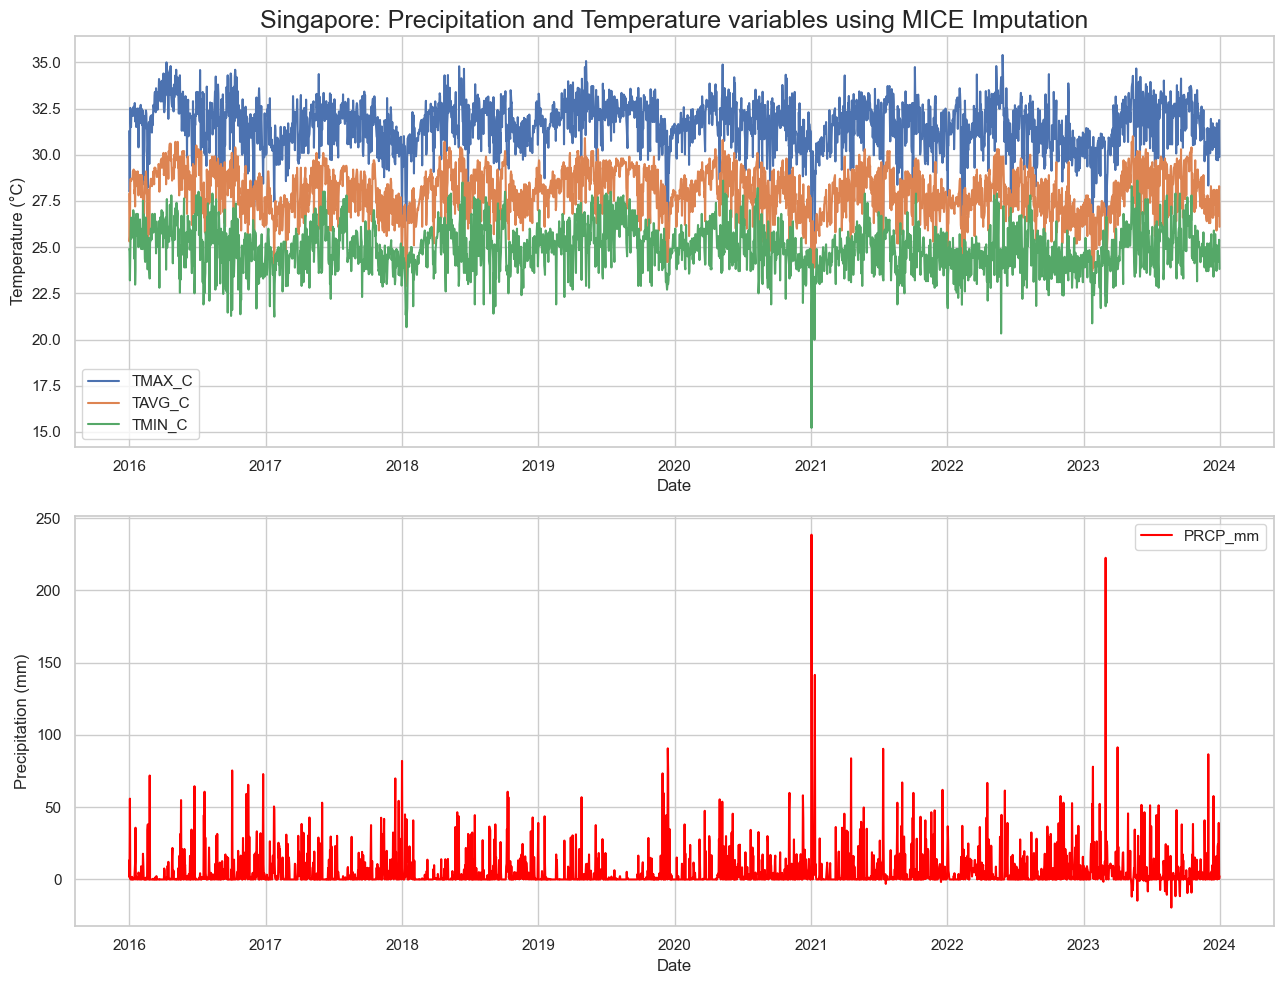

In [34]:
# Testing the MICE - Multiple Imputation by Chained Equations for all variables
# Inspiration: https://medium.com/@brijesh_soni/topic-9-mice-or-multivariate-imputation-with-chain-equation-f8fd435ca91, 
# https://towardsdatascience.com/multiple-imputation-with-random-forests-in-python-dec83c0ac55b

# Select the variables to include in the imputation process
selected_variables = ['TAVG_C', 'TMIN_C', 'TMAX_C', 'PRCP_mm']

# Create a subset of the DataFrame with only the selected variables
df_selected = df_1[selected_variables].copy()

# Create mask to identify the missing values in selected variables
missing_mask = df_selected.isna()

# Perform Multiple Imputation using MICE for the selected DataFrame
imputer = IterativeImputer(max_iter=10, random_state=0) #max_iter =100, tol=1e-6 for adjustment
imputed_values = imputer.fit_transform(df_selected)

# Convert the imputed array back to a DataFrame
imputed_df = pd.DataFrame(imputed_values, columns=df_selected.columns)

# Replace missing values with imputed ones for selected variables
df_selected[missing_mask] = imputed_df[missing_mask]

# Combine the imputed values with the original DataFrame, excluding the non-meaningful variables
df_1_mice = df_1.drop(columns=selected_variables, inplace=False)
df_1_mice = pd.concat([df_1_mice, df_selected], axis=1)

# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

# Visualize imputed daily average, minimum, and maximum temperature variables
for column in ['TMAX_C', 'TAVG_C', 'TMIN_C']:
    axes[0].plot(df_1_mice['Date'], df_1_mice[column], label=column)

axes[0].set_title(f"{location}: Precipitation and Temperature variables using MICE Imputation", fontsize=18)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Temperature (°C)')
axes[0].legend()

# Precipitation variable in a second subplot for appropriate scaling
axes[1].plot(df_1_mice['Date'], df_1_mice['PRCP_mm'], label='PRCP_mm', color='red')

axes[1].set_xlabel('Date')
axes[1].set_ylabel('Precipitation (mm)')
axes[1].legend()

plt.tight_layout()
plt.savefig(os.path.join(f"{location}_mice_imputation_temp_prec.png"), dpi=200)
plt.show()

In [35]:
df_1_mice.describe()

Date          Day        Month         Year  \
count                           2919  2919.000000  2919.000000  2919.000000   
mean   2019-12-31 01:51:59.013360640    15.731072     6.527578  2019.497431   
min              2016-01-01 00:00:00     1.000000     1.000000  2016.000000   
25%              2017-12-30 12:00:00     8.000000     4.000000  2017.000000   
50%              2019-12-30 00:00:00    16.000000     7.000000  2019.000000   
75%              2021-12-31 12:00:00    23.000000    10.000000  2021.500000   
max              2023-12-31 00:00:00    31.000000    12.000000  2023.000000   
std                              NaN     8.805061     3.448014     2.292501   

           Latitude     Longitude     Elevation       TAVG_C       TMIN_C  \
count  2.919000e+03  2.919000e+03  2.919000e+03  2919.000000  2919.000000   
mean   1.350000e+00  1.039940e+02  6.700000e+00    28.020692    24.939480   
min    1.350000e+00  1.039940e+02  6.700000e+00    22.900000    15.217798   
25%    1.350000e+00  1.039940e+02  6.700000e+00    27.200000    24.127217   
50%    1.350000e+00  1.039940e+02  6.700000e+00    28.100000    24.900000   
75%    1.350000e+00  1.039940e+02  6.700000e+00    28.900000    25.721748   
max    1.350000e+00  1.039940e+02  6.700000e+00    31.000000    28.600000   
std    2.220826e-16  1.421329e-14  8.883306e-16     1.216619     1.227514   

            TMAX_C      PRCP_mm  
count  2919.000000  2919.000000  
mean     31.627398     5.725495  
min      22.337599   -19.466544  
25%      30.841078     0.000000  
50%      31.770968     0.300000  
75%      32.512011     5.481377  
max      35.400000   238.500000  
std       1.296380    13.420165

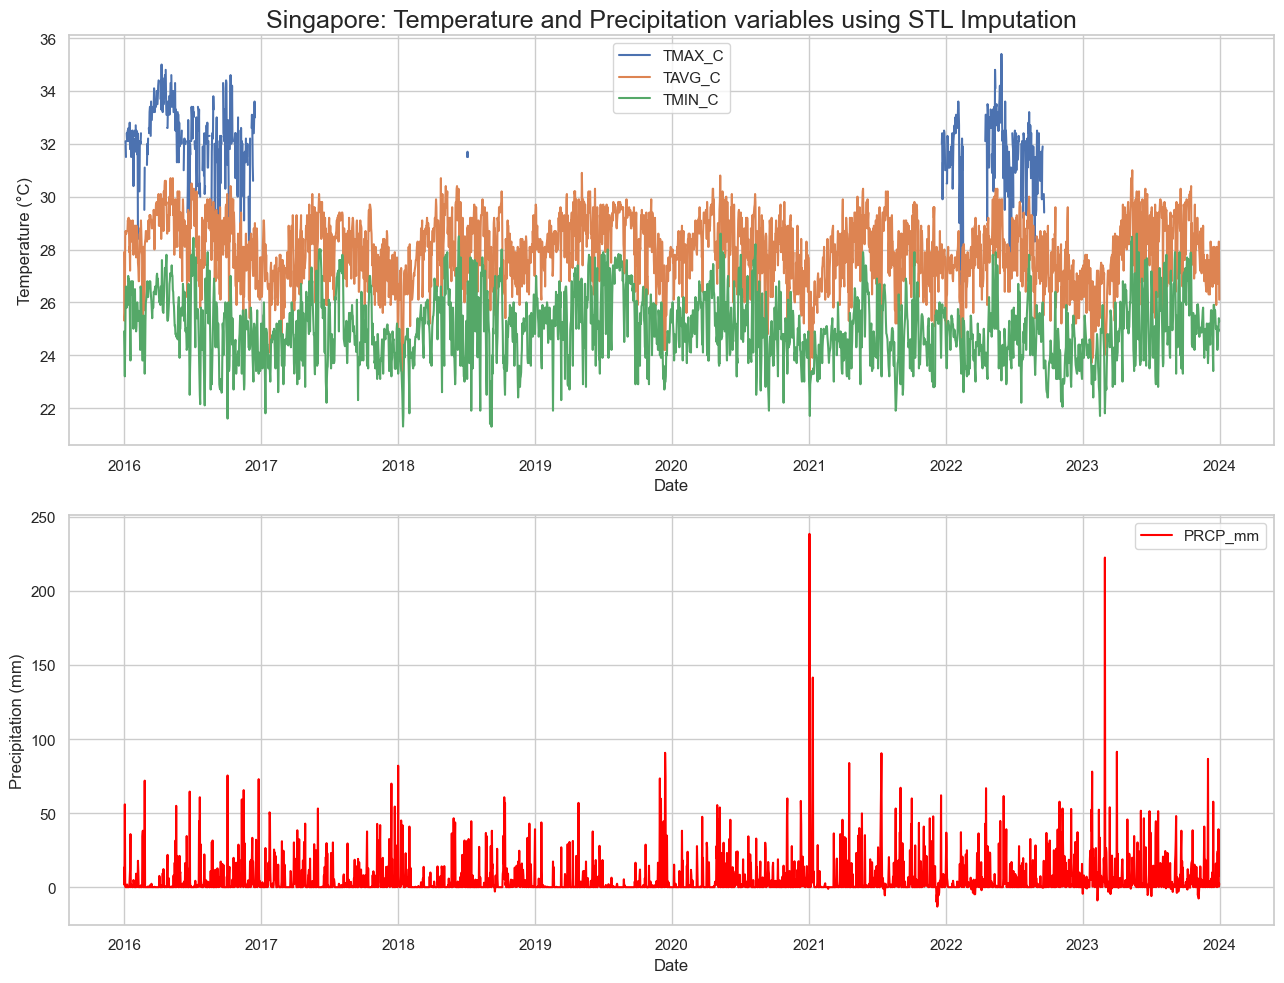

In [36]:
# Testing STL Decomposition for all variables
# Underlying time series does not have a known frequency in the index; therefore, STL decomposition enables the 'period' of the seasonality. 
# Using 'season' in STL requires knowledge of the number of full seasons but not how many observations are needed for the complete period.
# Reference: # https://medium.com/@tushar_aggarwal/master-the-power-of-seasonal-decomposition-of-time-series-stl-unveiling-the-essence-of-time-26c19a910314

# Make a copy of the original dataframe
df_1_decomposition = df_1.copy()

# Select the variables to impute missing values
# selected_variables = ['TAVG_C', 'TMIN_C', 'TMAX_C', 'PRCP_mm']

# Iterate over each selected variable and impute missing values using STL decomposition
for variable in selected_variables:
    # Fill missing values in the time series
    imputed_indices = df_1[df_1[variable].isnull()].index

    # Apply STL decomposition
    stl = STL(df_1_decomposition[variable].interpolate(), period=13)
    res = stl.fit()

    # Extract the seasonal and trend components
    seasonal_component = res.seasonal

    # Create the deseasonalised series
    df_deseasonalised = df_1_decomposition[variable] - seasonal_component

    # Interpolate missing values in the deseasonalised series
    df_deseasonalised_imputed = df_deseasonalised.interpolate(method="linear")

    # Add the seasonal component back to create the final imputed series
    df_imputed = df_deseasonalised_imputed + seasonal_component

    # Update the original dataframe with the imputed values
    df_1_decomposition.loc[imputed_indices, variable] = df_imputed[imputed_indices]

# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

# Visualize imputed daily average, minimum, and maximum temperature variables
for column in ['TMAX_C', 'TAVG_C', 'TMIN_C']:
    axes[0].plot(df_1_decomposition['Date'], df_1_decomposition[column], label=column)

axes[0].set_title(f"{location}: Temperature and Precipitation variables using STL Imputation", fontsize=18)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Temperature (°C)')
axes[0].legend()

# Precipitation variable in a second subplot for appropriate scaling
axes[1].plot(df_1_decomposition['Date'], df_1_decomposition['PRCP_mm'], label='PRCP_mm', color='red')

axes[1].set_xlabel('Date')
axes[1].set_ylabel('Precipitation (mm)')
axes[1].legend()

plt.tight_layout()
plt.savefig(os.path.join(f"{location}_stl_imputation.png"), dpi=200)
plt.show()

In [37]:
df_1_decomposition.describe()

Date          Day        Month         Year  \
count                           2919  2919.000000  2919.000000  2919.000000   
mean   2019-12-31 01:51:59.013360640    15.731072     6.527578  2019.497431   
min              2016-01-01 00:00:00     1.000000     1.000000  2016.000000   
25%              2017-12-30 12:00:00     8.000000     4.000000  2017.000000   
50%              2019-12-30 00:00:00    16.000000     7.000000  2019.000000   
75%              2021-12-31 12:00:00    23.000000    10.000000  2021.500000   
max              2023-12-31 00:00:00    31.000000    12.000000  2023.000000   
std                              NaN     8.805061     3.448014     2.292501   

           Latitude     Longitude     Elevation      PRCP_mm      TMAX_C  \
count  2.919000e+03  2.919000e+03  2.919000e+03  2919.000000  479.000000   
mean   1.350000e+00  1.039940e+02  6.700000e+00     5.794906   31.914196   
min    1.350000e+00  1.039940e+02  6.700000e+00   -13.131555   25.500000   
25%    1.350000e+00  1.039940e+02  6.700000e+00     0.000000   31.200000   
50%    1.350000e+00  1.039940e+02  6.700000e+00     0.300000   32.100000   
75%    1.350000e+00  1.039940e+02  6.700000e+00     5.100000   32.800000   
max    1.350000e+00  1.039940e+02  6.700000e+00   238.500000   35.400000   
std    2.220826e-16  1.421329e-14  8.883306e-16    13.572613    1.432719   

            TMIN_C       TAVG_C  
count  2919.000000  2919.000000  
mean     25.002277    28.020692  
min      21.293324    22.900000  
25%      24.097765    27.200000  
50%      24.900000    28.100000  
75%      25.800000    28.900000  
max      28.600000    31.000000  
std       1.252023     1.216619

#### Result

As explored in the previous section, the identified problem would be the variable 'TMAX_C'. All selected imputation methods perform adequately on the other variables that do not show continuous gaps. As written above, deletion and mean /median / mode imputation are not options. I added the Rolling Mean Statistics, even though it is not recommended for values missing completely at random (MCAR). 

Nevertheless, the main goal of the imputation is to maintain trends and seasonality to fully explain disease interactions. As seen in the literature review, seasonality is a relevant factor for the mosquito lifecycle. Considering these aspects, the implementation of the rolling mean imputation seems crucial. In that way, the mean is built in only a specified, small frame to capture environmental dynamics. 

Applying LOCF and NOCF is adequate as the assumption of similar near values is realistic in this use case, as daily weather is not random. However, these methods work best when no continuous gaps are in the variable. STL Decomposition was not successful in the analysis.

The MICE approach shows the best results, utilizing the other variables to impute the missing values in the maximum temperature variable. However, the precipitation variable adds noise to the imputation process, clearly representing the precipitation trend of 2021. Moreover, negative values in the PRCP_mm variables were detected when imputing all variables with MICE due to the retaining of relationships.

#### TMIN_C

In [38]:
df_1[df_1['TMIN_C'].isnull() & df_1['TMIN_C'].shift(-1).isnull()]
# There are 523 rows where the missing values are immediately following
# May not be continuous, but still need careful imputation

Date  Day  Month  Year  Latitude  Longitude  Elevation  \
13   2016-01-14   14      1  2016      1.35    103.994        6.7   
30   2016-01-31   31      1  2016      1.35    103.994        6.7   
36   2016-02-06    6      2  2016      1.35    103.994        6.7   
46   2016-02-16   16      2  2016      1.35    103.994        6.7   
47   2016-02-17   17      2  2016      1.35    103.994        6.7   
...         ...  ...    ...   ...       ...        ...        ...   
2886 2023-11-29   29     11  2023      1.35    103.994        6.7   
2892 2023-12-05    5     12  2023      1.35    103.994        6.7   
2897 2023-12-10   10     12  2023      1.35    103.994        6.7   
2898 2023-12-11   11     12  2023      1.35    103.994        6.7   
2918 2023-12-31   31     12  2023      1.35    103.994        6.7   

                                    Name  PRCP_mm  TMAX_C  TMIN_C  TAVG_C  
13    SINGAPORE CHANGI INTERNATIONAL, SN      0.0    32.1     NaN    28.8  
30    SINGAPORE CHANGI INTERNATIONAL, SN      0.0     NaN     NaN    28.9  
36    SINGAPORE CHANGI INTERNATIONAL, SN      0.3    32.4     NaN    28.4  
46    SINGAPORE CHANGI INTERNATIONAL, SN      0.0     NaN     NaN    28.6  
47    SINGAPORE CHANGI INTERNATIONAL, SN      0.0    31.4     NaN    28.1  
...                                  ...      ...     ...     ...     ...  
2886  SINGAPORE CHANGI INTERNATIONAL, SN      3.3     NaN     NaN    27.8  
2892  SINGAPORE CHANGI INTERNATIONAL, SN      0.0     NaN     NaN    27.3  
2897  SINGAPORE CHANGI INTERNATIONAL, SN      5.8     NaN     NaN    27.6  
2898  SINGAPORE CHANGI INTERNATIONAL, SN      0.0     NaN     NaN    27.3  
2918  SINGAPORE CHANGI INTERNATIONAL, SN      2.3     NaN     NaN    26.1  

[523 rows x 12 columns]

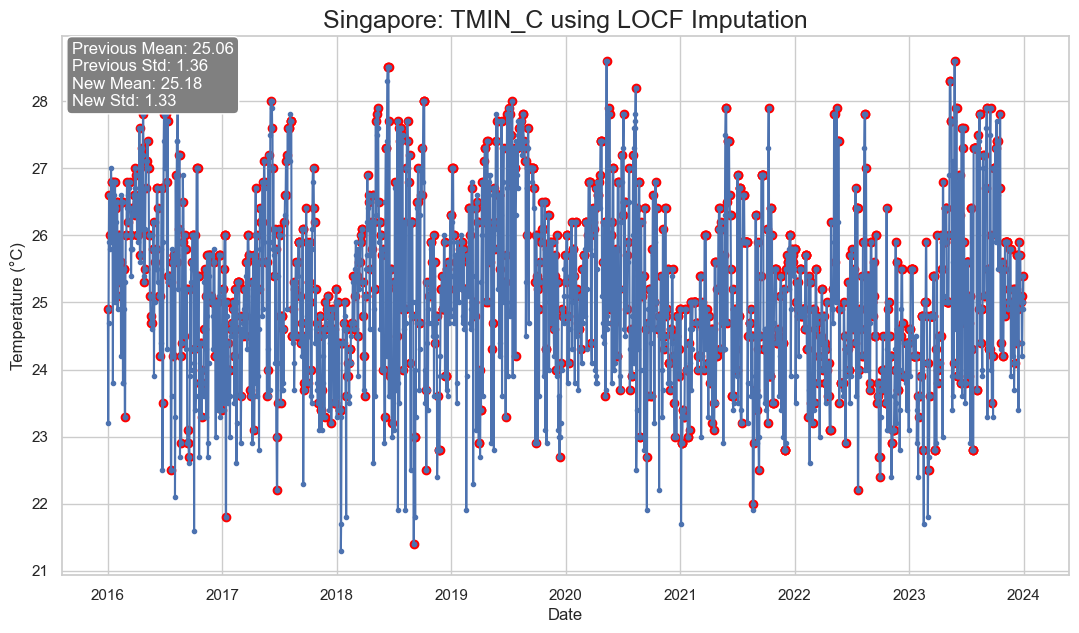

In [39]:
# Last Observation Carried Forward (LOCF)
# Can work here, as the assumption of similar values is adequate and bias stemmed; moreover, no continuous gaps
# Apply the forward fill method

# Create a copy of the original DataFrame
df_locf = df_1.copy()

# Calculate previous mean and standard deviation before imputation
prev_mean = df_1['TMIN_C'].mean()
prev_std = df_1['TMIN_C'].std()

# Apply the forward fill method to impute missing values in 'TMIN_C' variable
df_locf['TMIN_C'] = df_locf['TMIN_C'].ffill()

# Plot the imputed 'TMIN_C' variable
plt.figure(figsize=(13, 7))
plt.plot(df_locf['Date'], df_locf['TMIN_C'], '.-') 
plt.scatter(df_locf[df_1['TMIN_C'].isnull()]['Date'], df_locf[df_1['TMIN_C'].isnull()]['TMIN_C'], color='red')

# Calculate new overall mean and standard deviation after imputation
new_mean = df_locf['TMIN_C'].mean()
new_std = df_locf['TMIN_C'].std()

# Add text box to display previous and new overall mean and standard deviation
plt.text(0.01, 0.99, f'Previous Mean: {prev_mean:.2f}\nPrevious Std: {prev_std:.2f}\nNew Mean: {new_mean:.2f}\nNew Std: {new_std:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='white', bbox=dict(boxstyle='round', facecolor='grey'))

# Set labels
plt.title(f"{location}: TMIN_C using LOCF Imputation", fontsize=18)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

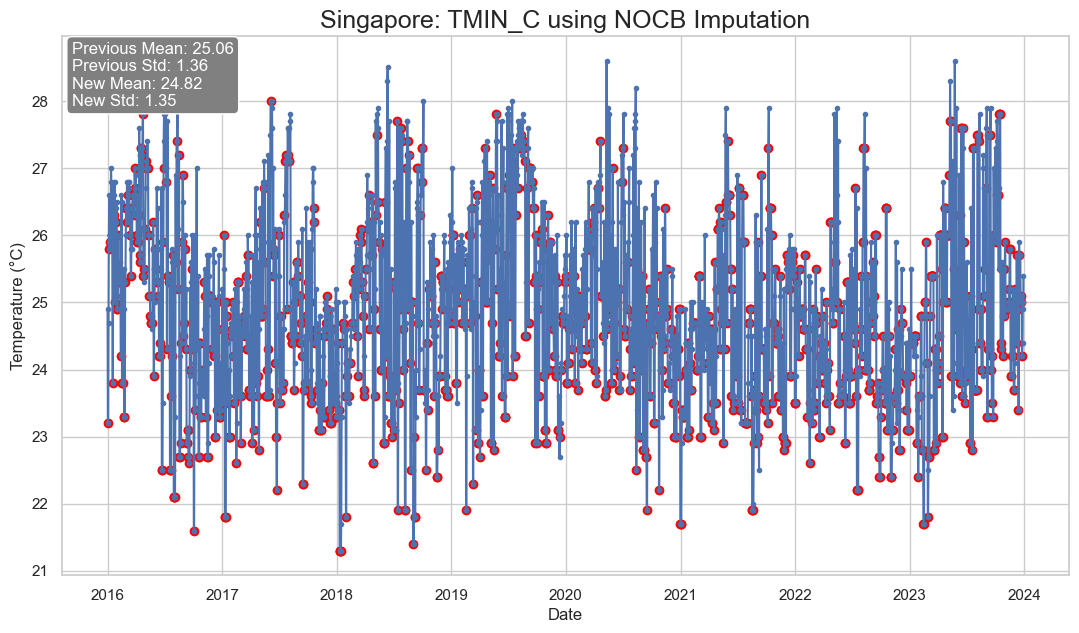

In [40]:
# Next Observation Carried Backward (NOCB)
# Can work here, as the assumption of similar values is adequate and bias stemmed; moreover, no continuous gaps
# Apply the backward fill method

# Create a copy of the original DataFrame
df_nocb = df_1.copy()

# Calculate previous mean and standard deviation before imputation
prev_mean = df_1['TMIN_C'].mean()
prev_std = df_1['TMIN_C'].std()

# Apply the backward fill method to impute missing values in 'TMIN_C' variable
df_nocb['TMIN_C'] = df_nocb['TMIN_C'].bfill()

# Plot the imputed 'TMIN_C' variable
plt.figure(figsize=(13, 7))
plt.plot(df_nocb['Date'], df_nocb['TMIN_C'], '.-')
plt.scatter(df_nocb[df_1['TMIN_C'].isnull()]['Date'], df_nocb[df_1['TMIN_C'].isnull()]['TMIN_C'], color='red')

# Calculate new overall mean and standard deviation
new_mean = df_nocb['TMIN_C'].mean()
new_std = df_nocb['TMIN_C'].std()

# Add text box to display previous and new overall mean and standard deviation
plt.text(0.01, 0.99, f'Previous Mean: {prev_mean:.2f}\nPrevious Std: {prev_std:.2f}\nNew Mean: {new_mean:.2f}\nNew Std: {new_std:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='white',bbox=dict(boxstyle='round', facecolor='grey'))

# Set labels
plt.title(f"{location}: TMIN_C using NOCB Imputation", fontsize=18)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

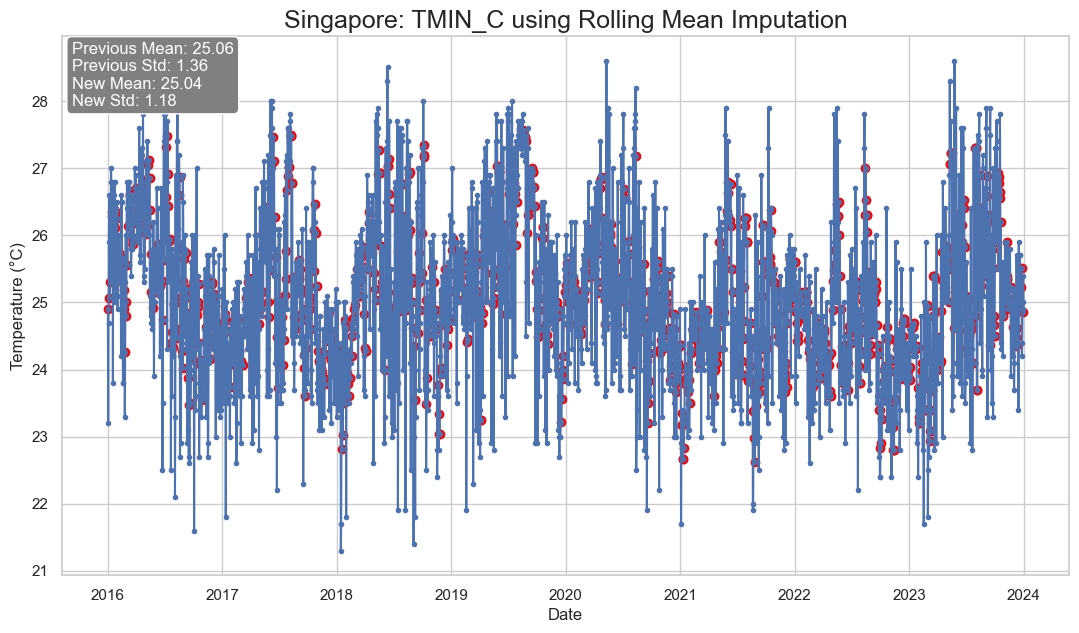

In [41]:
# Rolling mean statistics implemented
# window size set to 9, meaning it will include the current observation plus the 8 prior observations
# The larger the window size, the less extreme individual values will be imputed, however, closer to the overall mean
# min_periods determines the minimum number of non-null observations required in a rolling window

# Make a copy of the original DataFrame
df_rolling = df_1.copy()

# Calculate previous mean and standard deviation before imputation
prev_mean = df_1['TMIN_C'].mean()
prev_std = df_1['TMIN_C'].std()

# Mark the missing values before imputation
imputed_indices = df_rolling[df_rolling['TMIN_C'].isnull()].index

# Apply the rolling mean imputation method
df_rolling['TMIN_C'] = df_rolling['TMIN_C'].fillna(df_rolling['TMIN_C'].rolling(window=9, min_periods=1).mean().shift(1))

# Plot the imputed 'TMIN_C' variable
plt.figure(figsize=(13, 7))
plt.plot(df_rolling['Date'], df_rolling['TMIN_C'], '.-')
plt.scatter(df_rolling.loc[imputed_indices, 'Date'], df_rolling.loc[imputed_indices, 'TMIN_C'], color='red')

# Calculate new overall mean and standard deviation
new_mean = df_rolling['TMIN_C'].mean()
new_std = df_rolling['TMIN_C'].std()

# Add text box to display previous and new overall mean and standard deviation
plt.text(0.01, 0.99, f'Previous Mean: {prev_mean:.2f}\nPrevious Std: {prev_std:.2f}\nNew Mean: {new_mean:.2f}\nNew Std: {new_std:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='white',bbox=dict(boxstyle='round', facecolor='grey'))

# Set labels
plt.title(f"{location}: TMIN_C using Rolling Mean Imputation", fontsize=18)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

In [42]:
# To valid the number of windows required to achieve zero missing values
df_rolling.isnull().sum()
# The rolling mean statistics need a window of 9 to impute the missing values fully. 
# Not considered adding stability by increasing the min_periods, which increases the window size extremely.

Date            0
Day             0
Month           0
Year            0
Latitude        0
Longitude       0
Elevation       0
Name            0
PRCP_mm       163
TMAX_C       2440
TMIN_C          0
TAVG_C          0
dtype: int64

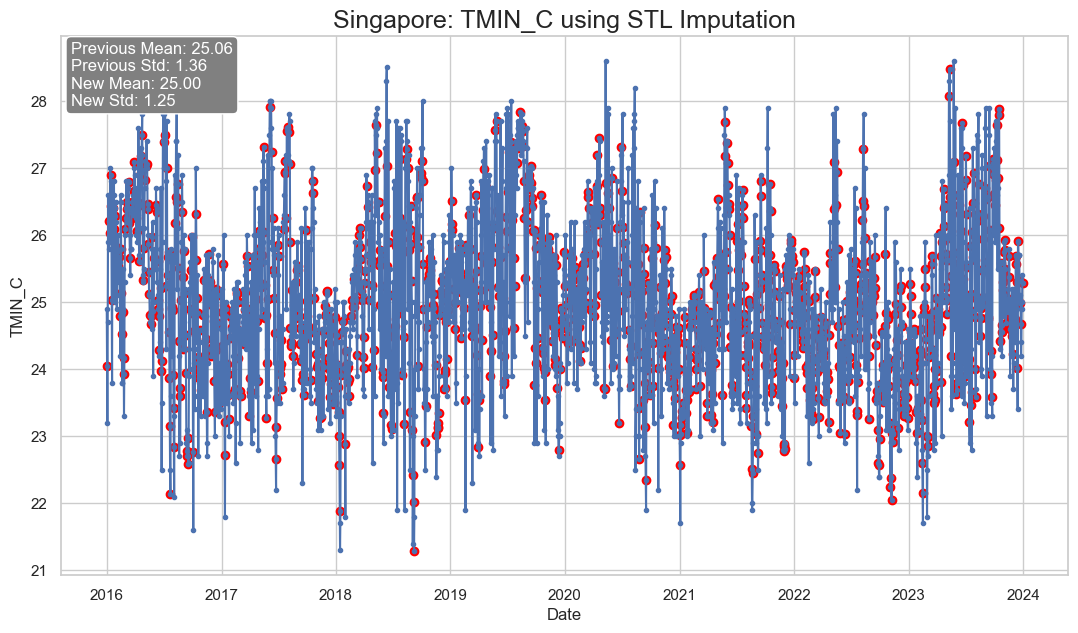

In [43]:
# Applying STL Imputation

# Make a copy of the original dataframe
df_decomposition = df_1.copy()

# Calculate previous mean and standard deviation before imputation
prev_mean = df_1['TMIN_C'].mean()
prev_std = df_1['TMIN_C'].std()

# Fill missing values in the time series
imputed_indices = df_1[df_1['TMIN_C'].isnull()].index

# Apply STL decomposition to the 'TMIN_C' variable
stl = STL(df_decomposition['TMIN_C'].interpolate(), period=13)  # Assuming daily frequency
res = stl.fit()

# Extract the seasonal and trend components
seasonal_component = res.seasonal

# Create the deseasonalised series
df_deseasonalised = df_decomposition['TMIN_C'] - seasonal_component

# Interpolate missing values in the deseasonalised series
df_deseasonalised_imputed = df_deseasonalised.interpolate(method="linear")

# Add the seasonal component back to create the final imputed series
df_imputed = df_deseasonalised_imputed + seasonal_component

# Update the original dataframe with the imputed values for 'TMIN_C'
df_decomposition.loc[imputed_indices, 'TMIN_C'] = df_imputed[imputed_indices]

# Plot the series using pandas
plt.figure(figsize=[13, 7])
plt.plot(df_decomposition['Date'], df_decomposition['TMIN_C'], '.-')
plt.scatter(df_decomposition.loc[imputed_indices, 'Date'], df_decomposition.loc[imputed_indices, 'TMIN_C'], color='red')

# Calculate new overall mean and standard deviation
new_mean = df_decomposition['TMIN_C'].mean()
new_std = df_decomposition['TMIN_C'].std()

# Add text box to display previous and new overall mean and standard deviation
plt.text(0.01, 0.99, f'Previous Mean: {prev_mean:.2f}\nPrevious Std: {prev_std:.2f}\nNew Mean: {new_mean:.2f}\nNew Std: {new_std:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='white',bbox=dict(boxstyle='round', facecolor='grey'))

# Set labels 
plt.title(f"{location}: TMIN_C using STL Imputation", fontsize=18)
plt.ylabel("TMIN_C")
plt.xlabel("Date")
plt.show()

#### Result

For imputation of the missing values in TMIN_C, LOCF proves to be the best approach, showing a stable mean and std dev after imputation. Generally, all methods show adequate results. NOCB shows a strong decrease in the mean value, therefore it was not further considered.

Rolling mean statistic was disregarded as the main goal was to retain statistical characteristics and the balance of mean, and it was not successful by preserving only the mean. When importing time-series data, it is important to keep the std dev constant to maintain variability or volatility.

#### PRCP_mm

In [44]:
df_1[df_1['PRCP_mm'].isnull() & df_1['PRCP_mm'].shift(-1).isnull()]
# There are 108 rows, where the missing values are immediately following
# This will be regarded when imputing the missing entries

Date  Day  Month  Year  Latitude  Longitude  Elevation  \
1394 2019-10-26   26     10  2019      1.35    103.994        6.7   
1395 2019-10-27   27     10  2019      1.35    103.994        6.7   
2014 2021-07-10   10      7  2021      1.35    103.994        6.7   
2015 2021-07-11   11      7  2021      1.35    103.994        6.7   
2021 2021-07-17   17      7  2021      1.35    103.994        6.7   
...         ...  ...    ...   ...       ...        ...        ...   
2850 2023-10-24   24     10  2023      1.35    103.994        6.7   
2860 2023-11-03    3     11  2023      1.35    103.994        6.7   
2861 2023-11-04    4     11  2023      1.35    103.994        6.7   
2862 2023-11-05    5     11  2023      1.35    103.994        6.7   
2863 2023-11-06    6     11  2023      1.35    103.994        6.7   

                                    Name  PRCP_mm  TMAX_C  TMIN_C  TAVG_C  
1394  SINGAPORE CHANGI INTERNATIONAL, SN      NaN     NaN     NaN    26.8  
1395  SINGAPORE CHANGI INTERNATIONAL, SN      NaN     NaN     NaN    27.0  
2014  SINGAPORE CHANGI INTERNATIONAL, SN      NaN     NaN     NaN    26.1  
2015  SINGAPORE CHANGI INTERNATIONAL, SN      NaN     NaN     NaN    26.1  
2021  SINGAPORE CHANGI INTERNATIONAL, SN      NaN     NaN     NaN    29.4  
...                                  ...      ...     ...     ...     ...  
2850  SINGAPORE CHANGI INTERNATIONAL, SN      NaN     NaN    25.5    28.6  
2860  SINGAPORE CHANGI INTERNATIONAL, SN      NaN     NaN     NaN    29.2  
2861  SINGAPORE CHANGI INTERNATIONAL, SN      NaN     NaN     NaN    28.6  
2862  SINGAPORE CHANGI INTERNATIONAL, SN      NaN     NaN     NaN    28.4  
2863  SINGAPORE CHANGI INTERNATIONAL, SN      NaN     NaN     NaN    28.5  

[108 rows x 12 columns]

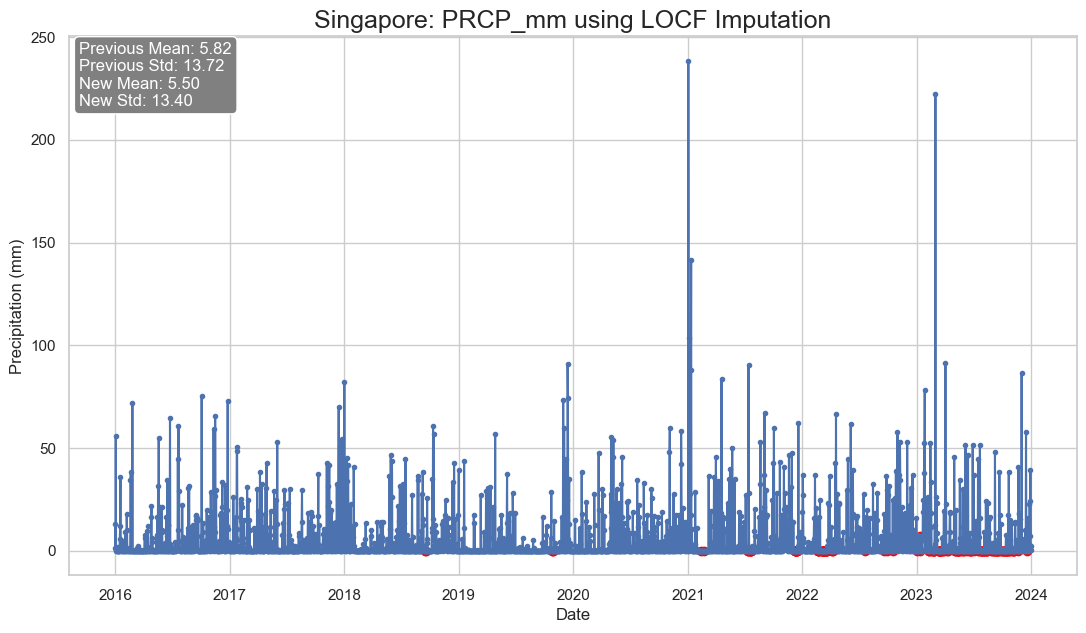

In [45]:
# Last Observation Carried Forward (LOCF)
# Can work here, as the assumption of similar values is adequate and bias stemmed; moreover, no continuous gaps
# Apply the forward fill method

# Create a copy of the original DataFrame
df_locf = df_1.copy()

# Calculate previous mean and standard deviation before imputation
prev_mean = df_1['PRCP_mm'].mean()
prev_std = df_1['PRCP_mm'].std()

# Apply the forward fill method to impute missing values in 'PRCP_mm' variable
df_locf['PRCP_mm'] = df_locf['PRCP_mm'].ffill()

# Plot the imputed 'PRCP_mm' variable
plt.figure(figsize=(13, 7))
plt.plot(df_locf['Date'], df_locf['PRCP_mm'], '.-')
plt.scatter(df_locf[df_1['PRCP_mm'].isnull()]['Date'], df_locf[df_1['PRCP_mm'].isnull()]['PRCP_mm'], color='red')

# Calculate new overall mean and standard deviation after imputation
new_mean = df_locf['PRCP_mm'].mean()
new_std = df_locf['PRCP_mm'].std()

# Add text box to display previous and new overall mean and standard deviation
plt.text(0.01, 0.99, f'Previous Mean: {prev_mean:.2f}\nPrevious Std: {prev_std:.2f}\nNew Mean: {new_mean:.2f}\nNew Std: {new_std:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='white', bbox=dict(boxstyle='round', facecolor='grey'))

# Set Labels
plt.title(f"{location}: PRCP_mm using LOCF Imputation", fontsize=18)
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.show()

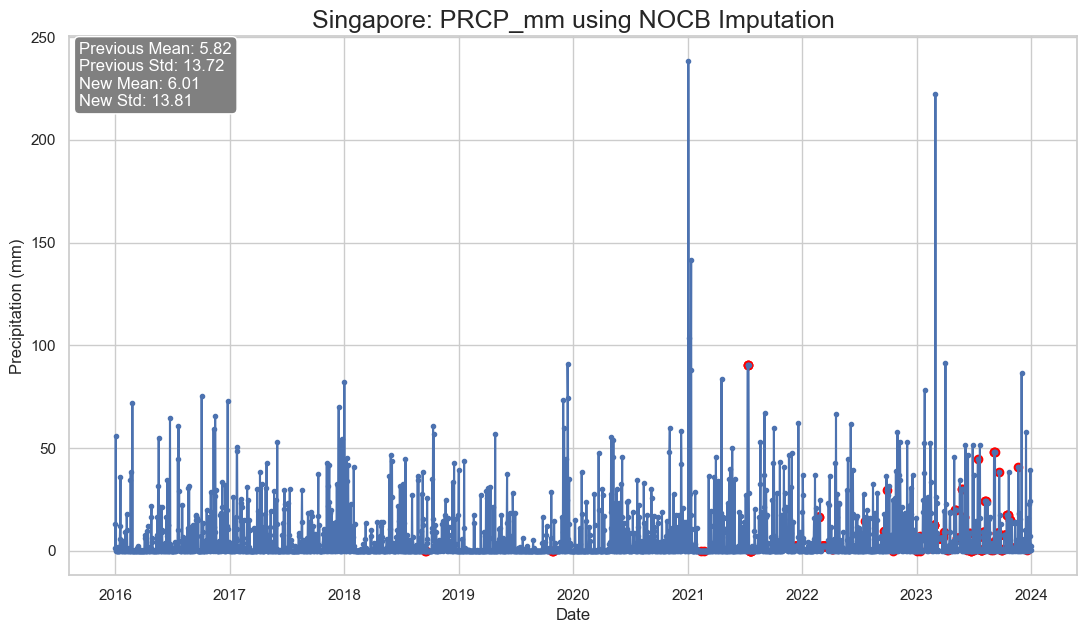

In [46]:
# Next Observation Carried Backward (NOCB)
# Can work here, as the assumption of similar values is adequate and bias stemmed; moreover, no continuous gaps
# Apply the backward fill method

# Create a copy of the original DataFrame
df_nocb = df_1.copy()

# Calculate previous mean and standard deviation before imputation
prev_mean = df_1['PRCP_mm'].mean()
prev_std = df_1['PRCP_mm'].std()

# Apply the backward fill method to impute missing values in 'PRCP_mm' variable
df_nocb['PRCP_mm'] = df_nocb['PRCP_mm'].bfill()

# Plot the imputed 'PRCP_mm' variable
plt.figure(figsize=(13, 7))
plt.plot(df_nocb['Date'], df_nocb['PRCP_mm'], '.-')
plt.scatter(df_nocb[df_1['PRCP_mm'].isnull()]['Date'], df_nocb[df_1['PRCP_mm'].isnull()]['PRCP_mm'], color='red')

# Calculate new overall mean and standard deviation
new_mean = df_nocb['PRCP_mm'].mean()
new_std = df_nocb['PRCP_mm'].std()

# Add text box to display previous and new overall mean and standard deviation
plt.text(0.01, 0.99, f'Previous Mean: {prev_mean:.2f}\nPrevious Std: {prev_std:.2f}\nNew Mean: {new_mean:.2f}\nNew Std: {new_std:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='white',bbox=dict(boxstyle='round', facecolor='grey'))

# Set labels
plt.title(f"{location}: PRCP_mm using NOCB Imputation", fontsize=18)
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.show()

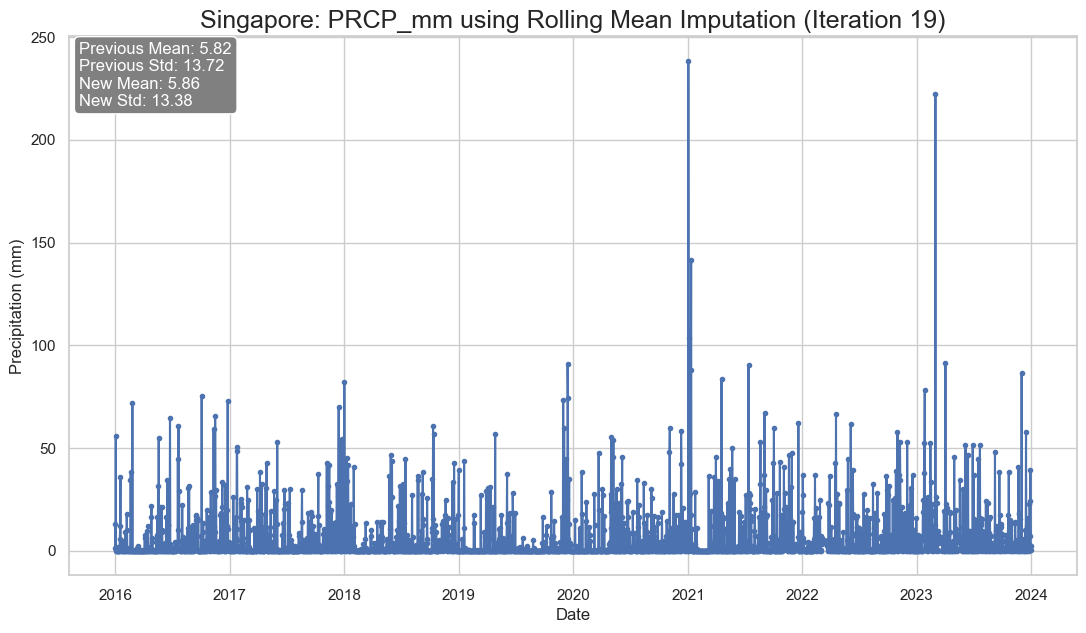

In [47]:
# Iterative Rolling mean imputation for the variable PRCP_mm

# Make a copy of the original DataFrame
df_rolling = df_1.copy()

# Initialize iteration counter
iteration = 0
prev_df = None

# Calculate the previous mean and standard deviation before imputation
prev_mean = df_rolling['PRCP_mm'].mean()
prev_std = df_rolling['PRCP_mm'].std()

# Continue the imputation process until convergence
while True:
    # Mark the missing values before imputation
    imputed_indices = df_rolling[df_rolling['PRCP_mm'].isnull()].index

    # Apply the rolling mean imputation method
    df_rolling['PRCP_mm'] = df_rolling['PRCP_mm'].fillna(df_rolling['PRCP_mm'].rolling(window=6, min_periods=6).mean().shift(1))

    # Check for convergence
    if df_rolling.equals(prev_df):
        break
    else:
        prev_df = df_rolling.copy()

    # Increment the iteration counter
    iteration += 1

# Calculate new overall mean and standard deviation
new_mean = df_rolling['PRCP_mm'].mean()
new_std = df_rolling['PRCP_mm'].std()

# Plot the main line with markers
plt.figure(figsize=(13, 7))
plt.plot(df_rolling['Date'], df_rolling['PRCP_mm'], '.-', label='PRCP_mm')

# Add points where data was imputed with red color
plt.scatter(df_rolling.loc[imputed_indices, 'Date'], df_rolling.loc[imputed_indices, 'PRCP_mm'], color='red')

# Add text box to display previous and new overall mean and standard deviation
plt.text(0.01, 0.99, f'Previous Mean: {prev_mean:.2f}\nPrevious Std: {prev_std:.2f}\nNew Mean: {new_mean:.2f}\nNew Std: {new_std:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='white',bbox=dict(boxstyle='round', facecolor='grey'))

# Set labels
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.title(f"{location}: PRCP_mm using Rolling Mean Imputation (Iteration {iteration})", fontsize=18)
plt.show()

In [48]:
# Check: The rolling mean statistics need 19 windows to impute the missing values fully
df_rolling.isnull().sum()

Date            0
Day             0
Month           0
Year            0
Latitude        0
Longitude       0
Elevation       0
Name            0
PRCP_mm         0
TMAX_C       2440
TMIN_C       1369
TAVG_C          0
dtype: int64

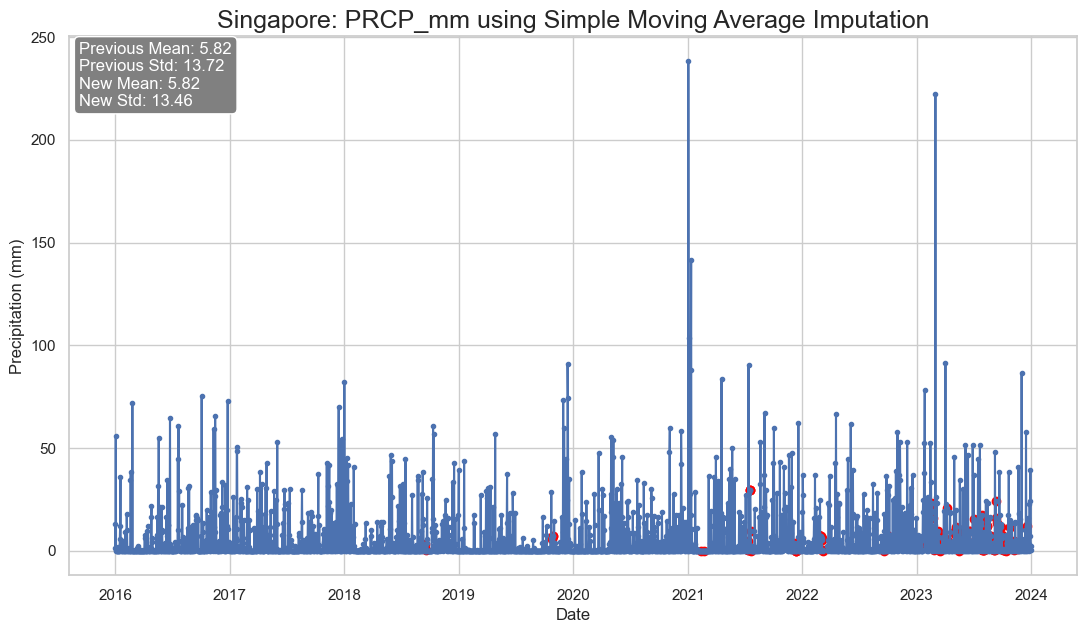

In [49]:
# Simple moving average imputation for the variable PRCP_mm
# For short-term missing value imputation, also SMA was introduced to capture  local trends effectively

# Make a copy of the original DataFrame
df_simple = df_1.copy()

# Calculate previous mean and standard deviation before imputation
prev_mean = df_1['PRCP_mm'].mean()
prev_std = df_1['PRCP_mm'].std()

# Apply the simple moving average imputation method
df_simple['PRCP_mm'] = df_simple['PRCP_mm'].fillna(df_simple['PRCP_mm'].rolling(window=7, min_periods=1).mean())

# Plot the variable
plt.figure(figsize=(13, 7))
plt.plot(df_simple['Date'], df_simple['PRCP_mm'], '.-')
plt.scatter(df_simple[df_1['PRCP_mm'].isnull()]['Date'], df_simple[df_1['PRCP_mm'].isnull()]['PRCP_mm'], color='red')

# Calculate new overall mean and standard deviation
new_mean = df_simple['PRCP_mm'].mean()
new_std = df_simple['PRCP_mm'].std()

# Add text box to display previous and new overall mean and standard deviation
plt.text(0.01, 0.99, f'Previous Mean: {prev_mean:.2f}\nPrevious Std: {prev_std:.2f}\nNew Mean: {new_mean:.2f}\nNew Std: {new_std:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='white',bbox=dict(boxstyle='round', facecolor='grey'))

# Set labels
plt.title(f"{location}: PRCP_mm using Simple Moving Average Imputation", fontsize=18)
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.show()

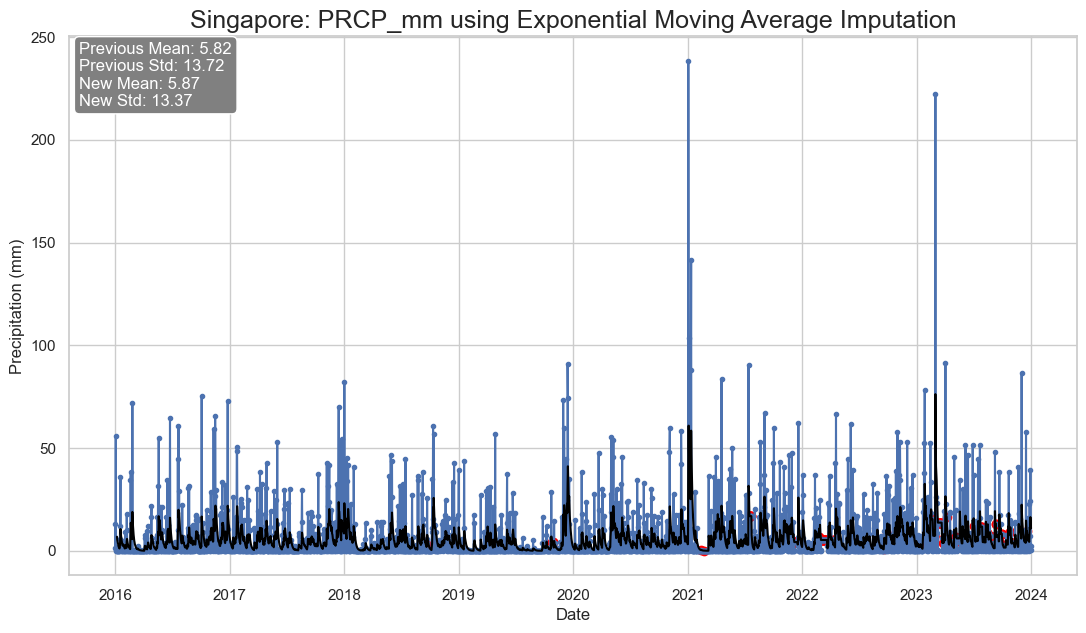

In [50]:
# Exponential moving average imputation for the variable PRCP_mm
# Uses an exponentially weighted moving average
# It assigns more weight to recent data points while calculating the average, making it more sensitive to recent trends in the data.

# Make a copy of the original DataFrame
df_exp = df_1.copy()

# Calculate previous mean and standard deviation before imputation
prev_mean = df_1['PRCP_mm'].mean()
prev_std = df_1['PRCP_mm'].std()

# Apply the exponential moving average imputation method
ema = df_exp['PRCP_mm'].ewm(alpha=0.2, min_periods=7).mean()
df_exp['PRCP_mm'] = df_exp['PRCP_mm'].fillna(ema)

# Plot the variable
plt.figure(figsize=(13, 7))
plt.plot(df_exp['Date'], df_exp['PRCP_mm'], '.-')
plt.scatter(df_exp[df_1['PRCP_mm'].isnull()]['Date'], df_exp[df_1['PRCP_mm'].isnull()]['PRCP_mm'], color='red')

# Plot the EMA curve
plt.plot(df_exp['Date'], ema, color='black')

# Calculate new overall mean and standard deviation
new_mean = df_exp['PRCP_mm'].mean()
new_std = df_exp['PRCP_mm'].std()

# Add text box to display previous and new overall mean and standard deviation
plt.text(0.01, 0.99, f'Previous Mean: {prev_mean:.2f}\nPrevious Std: {prev_std:.2f}\nNew Mean: {new_mean:.2f}\nNew Std: {new_std:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='white',bbox=dict(boxstyle='round', facecolor='grey'))

# Set labels
plt.title(f"{location}: PRCP_mm using Exponential Moving Average Imputation", fontsize=18)
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.show()

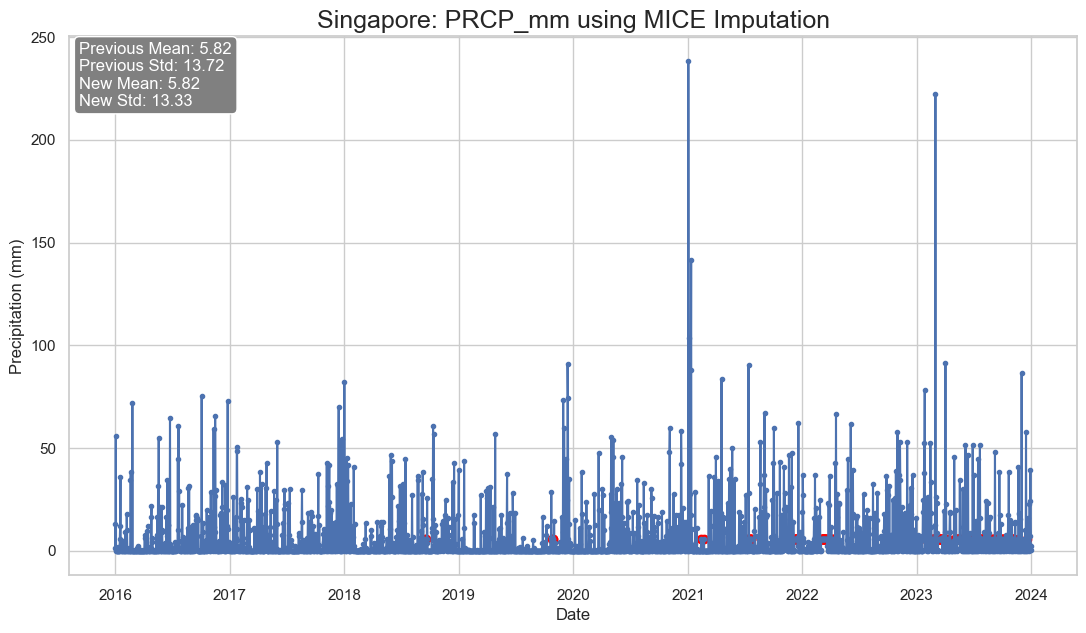

In [51]:
# MICE Imputation for PRCP_mm

# Create a copy of df_1
df_mice = df_1.copy()

# Perform Multiple Imputation using MICE for the variable PRCP_mm
imputer = IterativeImputer(max_iter=10, random_state=0)  # Adjustable up to max_iter=100, tol=1e-6,
imputed_values = imputer.fit_transform(df_mice[['PRCP_mm']])  # Impute only PRCP_mm variable

# Convert the imputed array back to a DataFrame
imputed_df = pd.DataFrame(imputed_values, columns=['PRCP_mm'])

# Track the indices where imputation occurred
imputed_indices = df_mice[df_mice['PRCP_mm'].isnull()].index

# Update the original DataFrame with the imputed values for PRCP_mm
df_mice['PRCP_mm'] = imputed_df['PRCP_mm']

# Plot the variable
plt.figure(figsize=(13, 7))
plt.plot(df_mice['Date'], df_mice['PRCP_mm'], '.-', label='PRCP_mm')
plt.scatter(df_mice.loc[imputed_indices, 'Date'], df_mice.loc[imputed_indices, 'PRCP_mm'], color='red')

# Calculate new overall mean and standard deviation
new_mean = df_mice['PRCP_mm'].mean()
new_std = df_mice['PRCP_mm'].std()

# Add text box to display previous and new overall mean and standard deviation
plt.text(0.01, 0.99, f'Previous Mean: {prev_mean:.2f}\nPrevious Std: {prev_std:.2f}\nNew Mean: {new_mean:.2f}\nNew Std: {new_std:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='white',bbox=dict(boxstyle='round', facecolor='grey'))

# Set labels
plt.title(f"{location}: PRCP_mm using MICE Imputation", fontsize=18)
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.show()

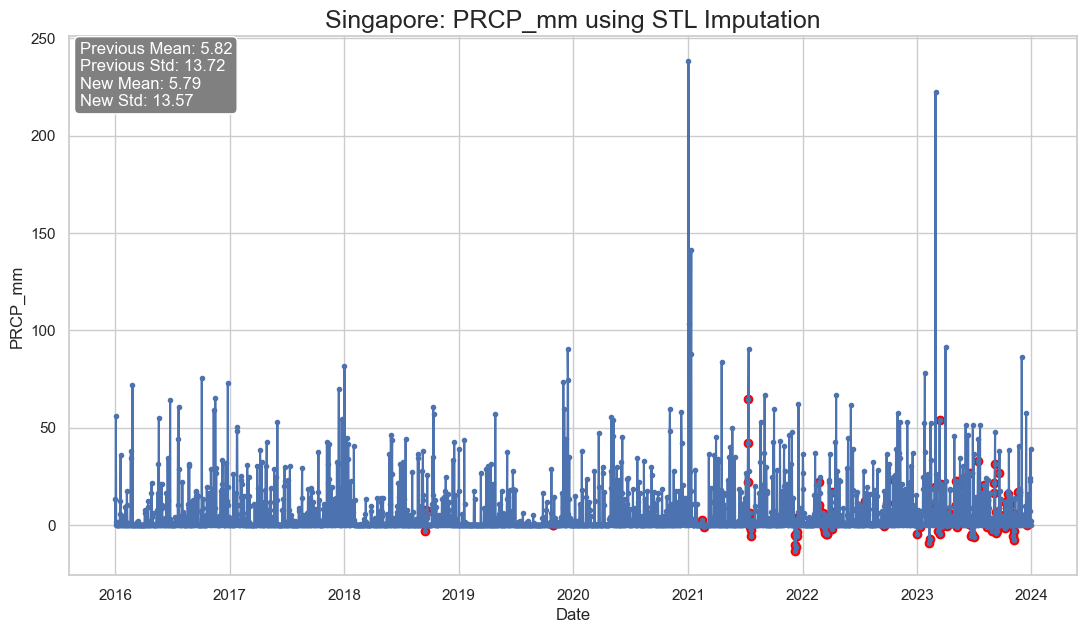

In [52]:
# Applying STL Imputation

# Make a copy of the original dataframe
df_decomposition = df_1.copy()

# Calculate previous mean and standard deviation before imputation
prev_mean = df_1['PRCP_mm'].mean()
prev_std = df_1['PRCP_mm'].std()

# Fill missing values in the time series
imputed_indices = df_1[df_1['PRCP_mm'].isnull()].index

# Apply STL decomposition to the 'PRCP_mm' variable
stl = STL(df_decomposition['PRCP_mm'].interpolate(), period=13)  # Assuming daily frequency
res = stl.fit()

# Extract the seasonal and trend components
seasonal_component = res.seasonal

# Create the deseasonalised series
df_deseasonalised = df_decomposition['PRCP_mm'] - seasonal_component

# Interpolate missing values in the deseasonalised series
df_deseasonalised_imputed = df_deseasonalised.interpolate(method="linear")

# Add the seasonal component back to create the final imputed series
df_imputed = df_deseasonalised_imputed + seasonal_component

# Update the original dataframe with the imputed values for 'PRCP_mm'
df_decomposition.loc[imputed_indices, 'PRCP_mm'] = df_imputed[imputed_indices]

# Plot the series using pandas
plt.figure(figsize=[13, 7])
plt.plot(df_decomposition['Date'], df_decomposition['PRCP_mm'], '.-')
plt.scatter(df_decomposition.loc[imputed_indices, 'Date'], df_decomposition.loc[imputed_indices, 'PRCP_mm'], color='red')

# Calculate new overall mean and standard deviation
new_mean = df_decomposition['PRCP_mm'].mean()
new_std = df_decomposition['PRCP_mm'].std()

# Add text box to display previous and new overall mean and standard deviation
plt.text(0.01, 0.99, f'Previous Mean: {prev_mean:.2f}\nPrevious Std: {prev_std:.2f}\nNew Mean: {new_mean:.2f}\nNew Std: {new_std:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='white',bbox=dict(boxstyle='round', facecolor='grey'))

plt.title(f"{location}: PRCP_mm using STL Imputation", fontsize=18)
plt.ylabel("PRCP_mm")
plt.xlabel("Date")
plt.show()

#### Result
NOCB is the best method to address missing values in the PRCP_mm feature, showing better results than MICE, LOCF, and Rolling Mean statistics. The main goal was to have a representation of the data structure by maintaining the statistical characteristics. When dealing with time series data, the std dev is an important indicator for measuring the deviation of the central value. 

The STL imputation shows irrational results, emphasizing the need for the visual component. This issue might occur due to unclear seasonality and trends. The two explored outliers do not seem to be a problem.

#### TMAX_C

In [53]:
df_1[df_1['TMAX_C'].isnull() & df_1['TMAX_C'].shift(-1).isnull()]
# There are 2340 rows, where the missing values are immediately following
# This will be regarded when imputing the missing entries

Date  Day  Month  Year  Latitude  Longitude  Elevation  \
2    2016-01-03    3      1  2016      1.35    103.994        6.7   
52   2016-02-22   22      2  2016      1.35    103.994        6.7   
56   2016-02-26   26      2  2016      1.35    103.994        6.7   
57   2016-02-27   27      2  2016      1.35    103.994        6.7   
95   2016-04-05    5      4  2016      1.35    103.994        6.7   
...         ...  ...    ...   ...       ...        ...        ...   
2914 2023-12-27   27     12  2023      1.35    103.994        6.7   
2915 2023-12-28   28     12  2023      1.35    103.994        6.7   
2916 2023-12-29   29     12  2023      1.35    103.994        6.7   
2917 2023-12-30   30     12  2023      1.35    103.994        6.7   
2918 2023-12-31   31     12  2023      1.35    103.994        6.7   

                                    Name  PRCP_mm  TMAX_C  TMIN_C  TAVG_C  
2     SINGAPORE CHANGI INTERNATIONAL, SN     55.9     NaN    23.2    25.6  
52    SINGAPORE CHANGI INTERNATIONAL, SN      0.0     NaN    25.5    28.1  
56    SINGAPORE CHANGI INTERNATIONAL, SN      0.0     NaN     NaN    28.3  
57    SINGAPORE CHANGI INTERNATIONAL, SN      0.0     NaN    25.3    28.4  
95    SINGAPORE CHANGI INTERNATIONAL, SN      6.1     NaN     NaN    28.9  
...                                  ...      ...     ...     ...     ...  
2914  SINGAPORE CHANGI INTERNATIONAL, SN     24.4     NaN    24.4    26.7  
2915  SINGAPORE CHANGI INTERNATIONAL, SN      7.1     NaN    25.0    26.9  
2916  SINGAPORE CHANGI INTERNATIONAL, SN     39.1     NaN    24.9    27.7  
2917  SINGAPORE CHANGI INTERNATIONAL, SN      0.3     NaN    25.4    28.3  
2918  SINGAPORE CHANGI INTERNATIONAL, SN      2.3     NaN     NaN    26.1  

[2340 rows x 12 columns]

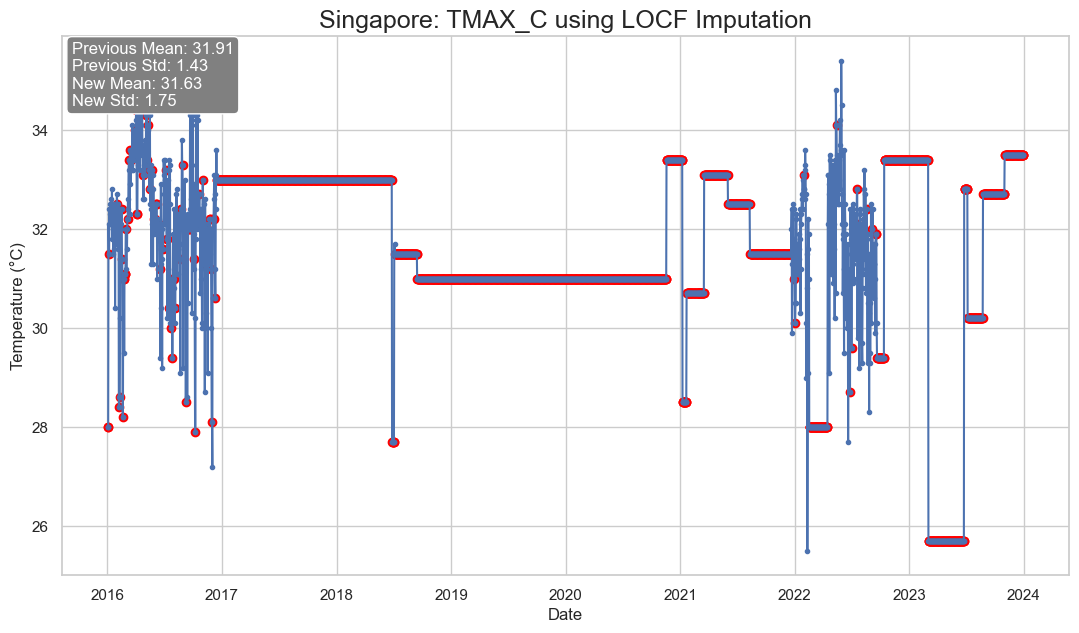

In [54]:
# Last Observation Carried Forward (LOCF)
# Can work here, as the assumption of similar values is adequate and bias stemmed; moreover, no continuous gaps
# Apply the forward fill method

# Create a copy of the original DataFrame
df_locf = df_1.copy()

# Calculate previous mean and standard deviation before imputation
prev_mean = df_1['TMAX_C'].mean()
prev_std = df_1['TMAX_C'].std()

# Apply the forward fill method to impute missing values in 'TMAX_C' variable
df_locf['TMAX_C'] = df_locf['TMAX_C'].ffill()

# Plot the imputed 'TMAX_C' variable
plt.figure(figsize=(13, 7))
plt.plot(df_locf['Date'], df_locf['TMAX_C'], '.-')
plt.scatter(df_locf[df_1['TMAX_C'].isnull()]['Date'], df_locf[df_1['TMAX_C'].isnull()]['TMAX_C'], color='red')

# Calculate new overall mean and standard deviation after imputation
new_mean = df_locf['TMAX_C'].mean()
new_std = df_locf['TMAX_C'].std()

# Add text box to display previous and new overall mean and standard deviation
plt.text(0.01, 0.99, f'Previous Mean: {prev_mean:.2f}\nPrevious Std: {prev_std:.2f}\nNew Mean: {new_mean:.2f}\nNew Std: {new_std:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='white', bbox=dict(boxstyle='round', facecolor='grey'))

# Set labels
plt.title(f"{location}: TMAX_C using LOCF Imputation", fontsize=18)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

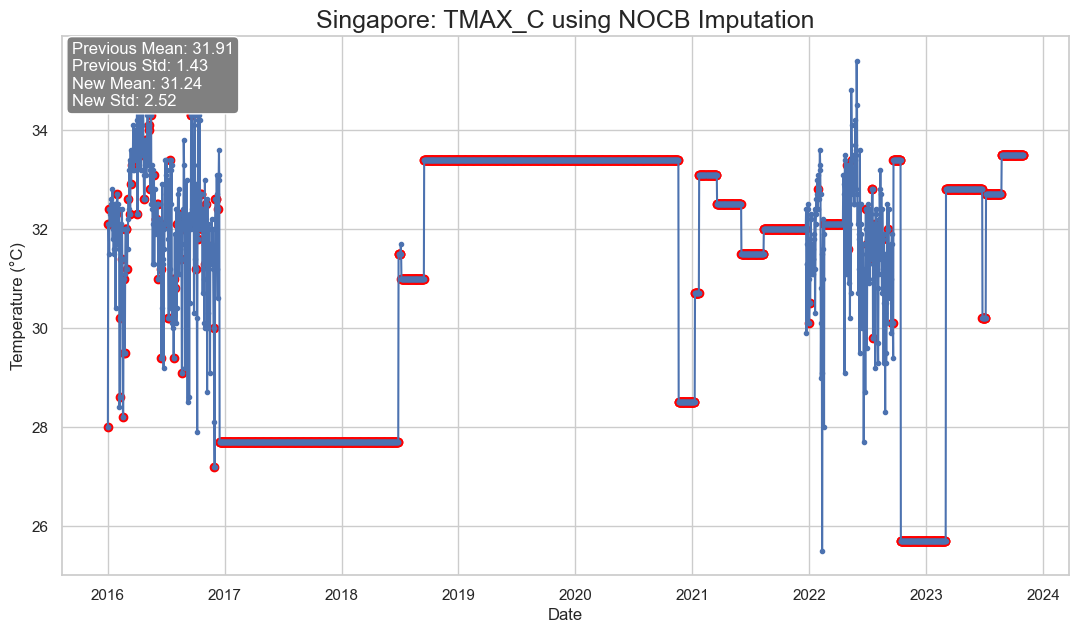

In [55]:
# Next Observation Carried Backward (NOCB)
# Can work here, as the assumption of similar values is adequate and bias stemmed; moreover, no continuous gaps
# Apply the backward fill method

# Create a copy of the original DataFrame
df_nocb = df_1.copy()

# Calculate previous mean and standard deviation before imputation
prev_mean = df_1['TMAX_C'].mean()
prev_std = df_1['TMAX_C'].std()

# Apply the backward fill method to impute missing values in 'TMAX_C' variable
df_nocb['TMAX_C'] = df_nocb['TMAX_C'].bfill()

# Plot the imputed 'TMAX_C' variable
plt.figure(figsize=(13, 7))
plt.plot(df_nocb['Date'], df_nocb['TMAX_C'], '.-')
plt.scatter(df_nocb[df_1['TMAX_C'].isnull()]['Date'], df_nocb[df_1['TMAX_C'].isnull()]['TMAX_C'], color='red')

# Calculate new overall mean and standard deviation
new_mean = df_nocb['TMAX_C'].mean()
new_std = df_nocb['TMAX_C'].std()

# Add text box to display previous and new overall mean and standard deviation
plt.text(0.01, 0.99, f'Previous Mean: {prev_mean:.2f}\nPrevious Std: {prev_std:.2f}\nNew Mean: {new_mean:.2f}\nNew Std: {new_std:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='white',bbox=dict(boxstyle='round', facecolor='grey'))

# Set labels
plt.title(f"{location}: TMAX_C using NOCB Imputation", fontsize=18)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

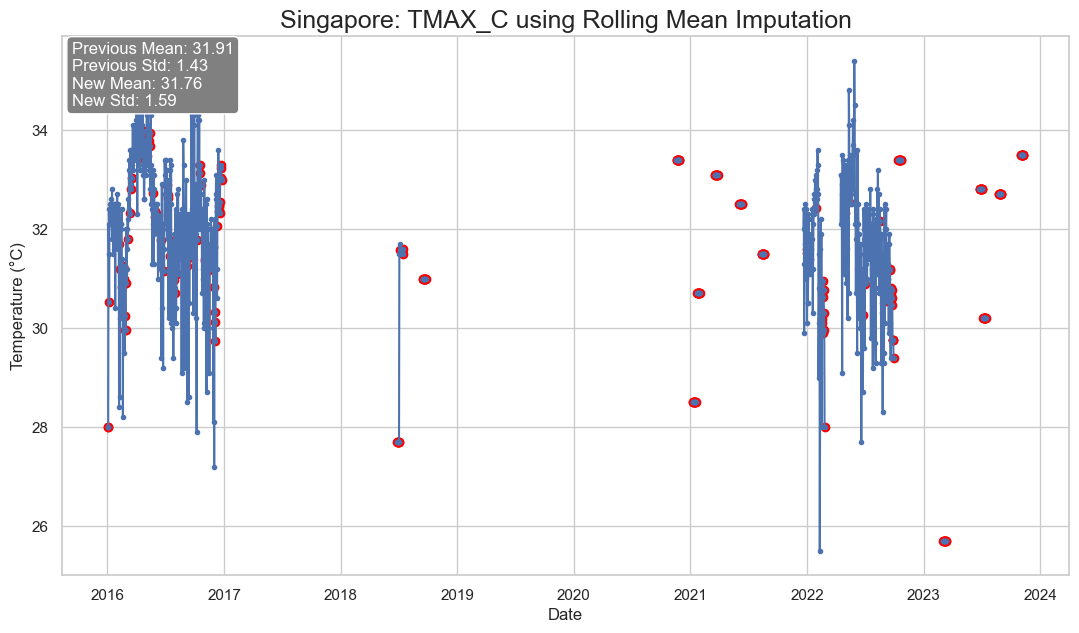

In [56]:
# Rolling mean statistics implemented
# window size set to 9, meaning it will include the current observation plus the 8 prior observations
# The larger the window size, the less extreme individual values will be imputed, however, closer to the overall mean
# min_periods determines the minimum number of non-null observations required in a rolling window

# Make a copy of the original DataFrame
df_rolling = df_1.copy()

# Calculate previous mean and standard deviation before imputation
prev_mean = df_1['TMAX_C'].mean()
prev_std = df_1['TMAX_C'].std()

# Mark the missing values before imputation
imputed_indices = df_rolling[df_rolling['TMAX_C'].isnull()].index

# Apply the rolling mean imputation method
df_rolling['TMAX_C'] = df_rolling['TMAX_C'].fillna(df_rolling['TMAX_C'].rolling(window=9, min_periods=1).mean().shift(1))

# Plot variable
plt.figure(figsize=(13, 7))
plt.plot(df_rolling['Date'], df_rolling['TMAX_C'], '.-')
plt.scatter(df_rolling.loc[imputed_indices, 'Date'], df_rolling.loc[imputed_indices, 'TMAX_C'], color='red')

# Calculate new overall mean and standard deviation
new_mean = df_rolling['TMAX_C'].mean()
new_std = df_rolling['TMAX_C'].std()

# Add text box to display previous and new overall mean and standard deviation
plt.text(0.01, 0.99, f'Previous Mean: {prev_mean:.2f}\nPrevious Std: {prev_std:.2f}\nNew Mean: {new_mean:.2f}\nNew Std: {new_std:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='white',bbox=dict(boxstyle='round', facecolor='grey'))

# Set labels
plt.title(f"{location}: TMAX_C using Rolling Mean Imputation", fontsize=18)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.show()

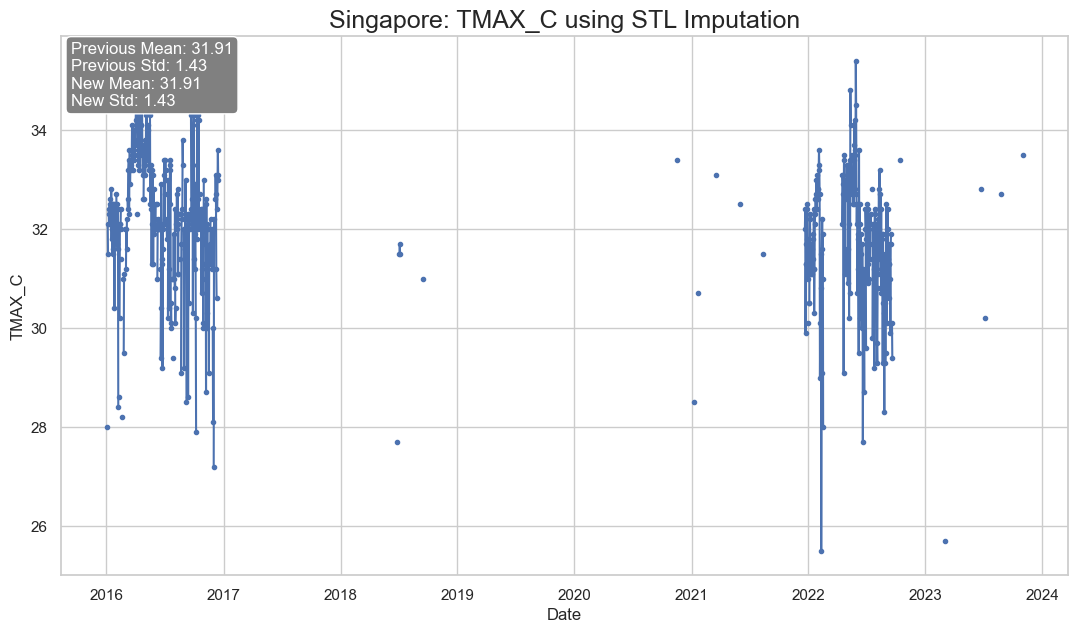

In [57]:
# Applying STL Imputation

# Make a copy of the original dataframe
df_decomposition = df_1.copy()

# Calculate previous mean and standard deviation before imputation
prev_mean = df_1['TMAX_C'].mean()
prev_std = df_1['TMAX_C'].std()

# Fill missing values in the time series
imputed_indices = df_1[df_1['TMAX_C'].isnull()].index

# Apply STL decomposition to the 'TMAX_C' variable
stl = STL(df_decomposition['TMAX_C'].interpolate(), period=13)  # Assuming daily frequency
res = stl.fit()

# Extract the seasonal and trend components
seasonal_component = res.seasonal

# Create the deseasonalised series
df_deseasonalised = df_decomposition['TMAX_C'] - seasonal_component

# Interpolate missing values in the deseasonalised series
df_deseasonalised_imputed = df_deseasonalised.interpolate(method="linear")

# Add the seasonal component back to create the final imputed series
df_imputed = df_deseasonalised_imputed + seasonal_component

# Update the original dataframe with the imputed values for 'TMAX_C'
df_decomposition.loc[imputed_indices, 'TMAX_C'] = df_imputed[imputed_indices]

# Plot the series using pandas
plt.figure(figsize=[13, 7])
plt.plot(df_decomposition['Date'], df_decomposition['TMAX_C'], '.-')
plt.scatter(df_decomposition.loc[imputed_indices, 'Date'], df_decomposition.loc[imputed_indices, 'TMAX_C'], color='red')

# Calculate new overall mean and standard deviation
new_mean = df_decomposition['TMAX_C'].mean()
new_std = df_decomposition['TMAX_C'].std()

# Add text box to display previous and new overall mean and standard deviation
plt.text(0.01, 0.99, f'Previous Mean: {prev_mean:.2f}\nPrevious Std: {prev_std:.2f}\nNew Mean: {new_mean:.2f}\nNew Std: {new_std:.2f}', 
         transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', color='white',bbox=dict(boxstyle='round', facecolor='grey'))

# Set labels
plt.title(f"{location}: TMAX_C using STL Imputation", fontsize=18)
plt.ylabel("TMAX_C")
plt.xlabel("Date")
plt.show()

#### Result

Due to the continuous gap in the maximum temperature variable, imputation methods with only one variable as an input do not work. Most methods were not suitable because they created significant distortion, obliterating temporal dependencies.
As seen above in the one method for all variables section, MICE performed well when integrating all temperature variables. Therefore, this approach will be utilized. 

#### Final imputation

In [58]:
# Performance of final imputation

# Create a copy of the original DataFrame
df_imputed =df_1.copy()

# Applying the backward fill method to impute missing values in 'TMIN_C' variable
df_imputed['PRCP_mm'] = df_imputed['PRCP_mm'].bfill()

# Applying MICE - Multiple imputation method for all remaining variables

# Select the variables to include in the imputation process
selected_variables = ['TAVG_C', 'TMIN_C', 'TMAX_C']

# Create a subset of the DataFrame with only the selected variables
df_selected = df_imputed[selected_variables].copy()

# Create mask to identify the missing values in selected variables
missing_mask = df_selected.isna()

# Perform Multiple Imputation using MICE for the selected DataFrame
imputer = IterativeImputer(max_iter=10, random_state=0)  # max_iter=100, tol=1e-6 for experimentation
imputed_values = imputer.fit_transform(df_selected)  # Impute missing values

# Convert the imputed array back to a DataFrame
imputed_df = pd.DataFrame(imputed_values, columns=df_selected.columns)

# Replace missing values with imputed ones for selected variables
df_imputed[selected_variables] = imputed_df.where(missing_mask, df_imputed[selected_variables])

In [59]:
# Check of final imputation

df_imputed.isna().sum()

Date         0
Day          0
Month        0
Year         0
Latitude     0
Longitude    0
Elevation    0
Name         0
PRCP_mm      0
TMAX_C       0
TMIN_C       0
TAVG_C       0
dtype: int64

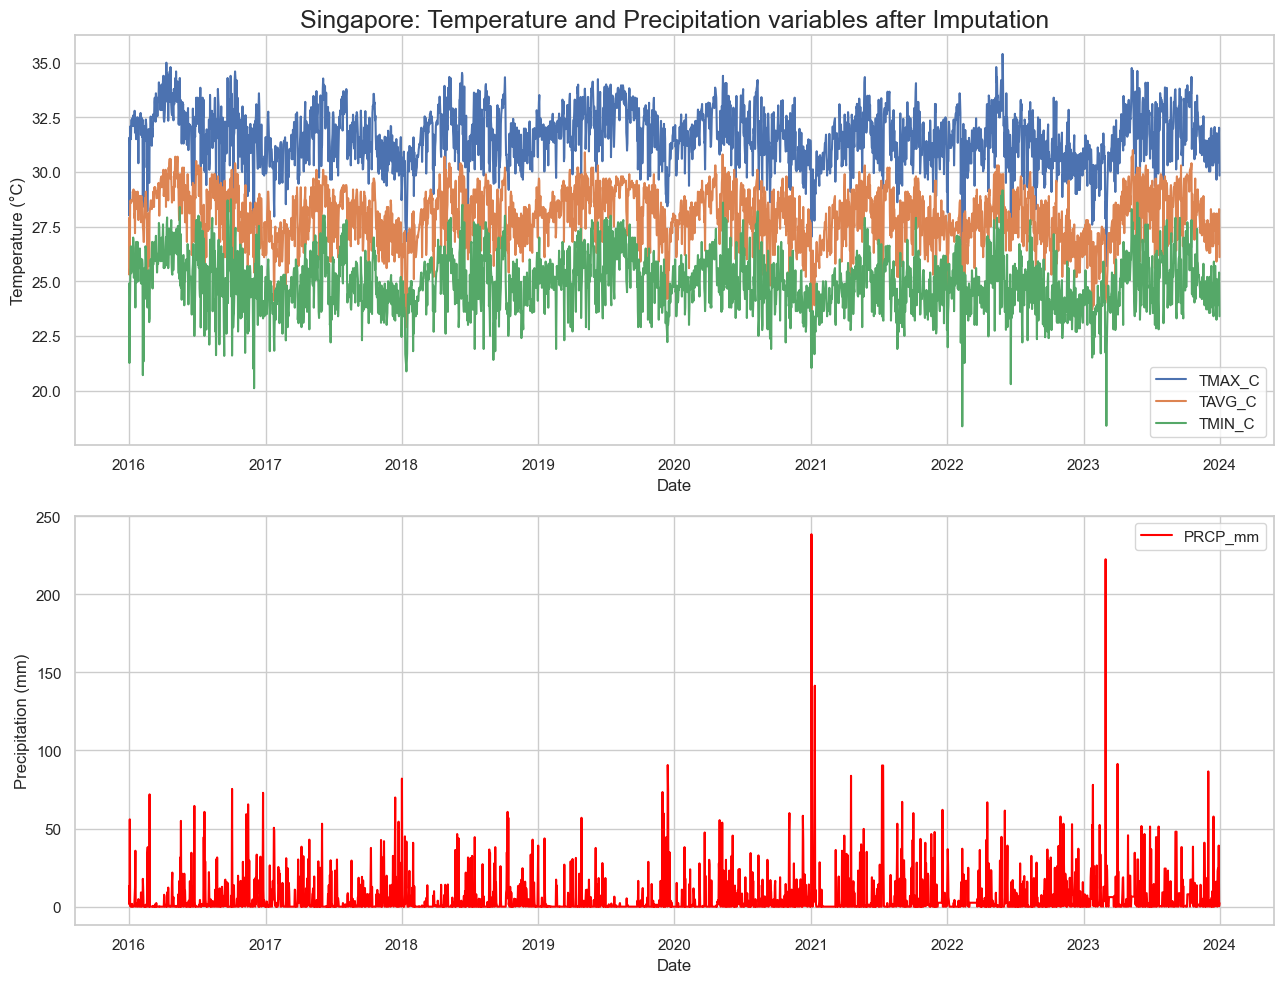

In [60]:
# Visualization of final imputation

# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 1, figsize=(13, 10))

# Visualize imputed daily average, minimum, and maximum temperature variables
for column in ['TMAX_C', 'TAVG_C', 'TMIN_C']:
    axes[0].plot(df_imputed['Date'], df_imputed[column], label=column)

axes[0].set_title(f"{location}: Temperature and Precipitation variables after Imputation", fontsize=18)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Temperature (°C)')
axes[0].legend()

# Precipitation variable in a second subplot for appropriate scaling
axes[1].plot(df_imputed['Date'], df_imputed['PRCP_mm'], label='PRCP_mm', color='red')

axes[1].set_xlabel('Date')
axes[1].set_ylabel('Precipitation (mm)')
axes[1].legend()

plt.tight_layout()
plt.savefig(os.path.join(f"{location}_locf_imputation.png"), dpi=200)
plt.show()

In [61]:
# Checking the change in statistical measures to confirm the approach's effectiveness.

# Calculate the mean and standard deviation for df_1
df_1_stats = df_1[['TAVG_C', 'TMIN_C', 'TMAX_C', 'PRCP_mm']].agg(['mean', 'std'])

# Calculate mean and standard deviation for df_imputed
df_imp1_stats = df_imputed[['TAVG_C', 'TMIN_C', 'TMAX_C', 'PRCP_mm']].agg(['mean', 'std'])

# Combine statistics into a single dataframe
statistics_df = pd.DataFrame({
    'df_1_mean': df_1_stats.loc['mean'].values,
    'df_imp1_mean': df_imp1_stats.loc['mean'].values,
    'df_1_std': df_1_stats.loc['std'].values,
    'df_imp1_std': df_imp1_stats.loc['std'].values,
})

# Set the index for the dataframe
statistics_df.index = ['TAVG_C', 'TMIN_C', 'TMAX_C', 'PRCP_mm']

# Print the statistics dataframe
statistics_df

df_1_mean  df_imp1_mean   df_1_std  df_imp1_std
TAVG_C   28.020692     28.020692   1.216619     1.216619
TMIN_C   25.061806     24.909789   1.358805     1.286174
TMAX_C   31.914196     31.633425   1.432719     1.246753
PRCP_mm   5.823875      6.008804  13.721103    13.807498

## 4. Export

In [62]:
# Saving the cleaned data frame df_1 in a new Excel file
# Previous file: df_1 = pd.read_excel(file_singapore, sheet_name='Daily Weather Data')
#cleaned_file = "/Users/Fine/Documents/Master Business Analytics/Thesis/Research Data/Final Data/Singapore/Singapore Cleaned.xlsx"
#df_imputed.to_excel(cleaned_file, index=False)